In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import cufflinks as cf
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot,iplot
pd.options.plotting.backend = "plotly"
cf.go_offline()
pd.set_option('display.max_columns', 500)

In [3]:
import os
os.getcwd()

'/Users/jesusarredondo/Documents/Diplomado/Proyecto/Modulo3'

In [4]:
#Importamos la base concatenada
path = os.getcwd()[:-7]
path

'/Users/jesusarredondo/Documents/Diplomado/Proyecto/'

In [5]:
df_tad=pd.read_csv(path+"TAD_COVID19.csv",encoding="utf-8")
df_tad

,Municipio,Entidad,Total de Registros,Caso de covid-19 confirmado por asociación clínica epidemiológica,Caso de covid-19 confirmado por comité de dictaminación,Caso de sars-cov-2 confirmado,Caso sospechoso,Inválido por laboratorio,Negativo a sars-cov-2,No realizado por laboratorio,Total de casos confirmados,No UCI,No aplica UCI,No especificado UCI,Si UCI,No Toma de muesta lab,Si Toma de muesta lab,No Toma de muesta antigeno,Si Toma de muesta antigeno,No aplica (caso sin muestra) Resultado lab,No positivo a sars-cov-2 Resultado lab,Positivo a sars-cov-2 Resultado lab,Resultado no adecuado Resultado lab,Resultado pendiente Resultado lab,Negativo a sars-cov-2 Resultado antigeno,No aplica (caso sin muestra) Resultado antigeno,Positivo a sars-cov-2 Resultado antigeno,Origen Fuera de usmer,Origen Usmer,Sector at Cruz roja,Sector at Dif,Sector at Estatal,Sector at Imss,Sector at Imss-bienestar,Sector at Issste,Sector at Municipal,Sector at Pemex,Sector at Privada,Sector at Sedena,Sector at Semar,Sector at Ssa,Sector at Universitario,Paciente Hombre,Paciente Mujer,Paciente Ambulatorio,Paciente Hospitalizado,No Intubado,No aplica Intubado,No especificado Intubado,Si Intubado,No Neumonia,No especificado Neumonia,Si Neumonia,Edad promedio,Edad maxima,Edad minima,No Diabetes,Se ignora Diabetes,Si Diabetes,No Epoc,Se ignora Epoc,Si Epoc,No Asma,Se ignora Asma,Si Asma,No Inmusupr,Se ignora Inmusupr,Si Inmusupr,No Hipertension,Se ignora Hipertension,Si Hipertension,No Otras complicaciones,Se ignora Otras complicaciones,Si Otras complicaciones,No Cardiovascular,Se ignora Cardiovascular,Si Cardiovascular,No Obesidad,Se ignora Obesidad,Si Obesidad,No Renal cronica,Se ignora Renal cronica,Si Renal cronica,No Tabaquismo,Se ignora Tabaquismo,Si Tabaquismo,No Contacto otro caso,No especificado Contacto otro caso,Si Contacto otro caso,Estado Muerto,Estado Vivo,Tasa de mortalidad,Caso de covid-19 confirmado por asociación clínica epidemiológica Noviembre 2021,Caso de covid-19 confirmado por comité de dictaminación Noviembre 2021,Caso de sars-cov-2 confirmado Noviembre 2021,Caso sospechoso Noviembre 2021,Inválido por laboratorio Noviembre 2021,Negativo a sars-cov-2 Noviembre 2021,No realizado por laboratorio Noviembre 2021,Ambulatorio Noviembre 2021,Hospitalizado Noviembre 2021,Muerto Noviembre 2021,Vivo Noviembre 2021,Caso de covid-19 confirmado por asociación clínica epidemiológica Diciembre 2021,Caso de covid-19 confirmado por comité de dictaminación Diciembre 2021,Caso de sars-cov-2 confirmado Diciembre 2021,Caso sospechoso Diciembre 2021,Inválido por laboratorio Diciembre 2021,Negativo a sars-cov-2 Diciembre 2021,No realizado por laboratorio Diciembre 2021,Ambulatorio Diciembre 2021,Hospitalizado Diciembre 2021,Muerto Diciembre 2021,Vivo Diciembre 2021,Caso de covid-19 confirmado por asociación clínica epidemiológica Enero 2022,Caso de covid-19 confirmado por comité de dictaminación Enero 2022,Caso de sars-cov-2 confirmado Enero 2022,Caso sospechoso Enero 2022,Inválido por laboratorio Enero 2022,Negativo a sars-cov-2 Enero 2022,No realizado por laboratorio Enero 2022,Ambulatorio Enero 2022,Hospitalizado Enero 2022,Muerto Enero 2022,Vivo Enero 2022,Caso de covid-19 confirmado por asociación clínica epidemiológica Febrero 2022,Caso de covid-19 confirmado por comité de dictaminación Febrero 2022,Caso de sars-cov-2 confirmado Febrero 2022,Caso sospechoso Febrero 2022,Inválido por laboratorio Febrero 2022,Negativo a sars-cov-2 Febrero 2022,No realizado por laboratorio Febrero 2022,Ambulatorio Febrero 2022,Hospitalizado Febrero 2022,Muerto Febrero 2022,Vivo Febrero 2022
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,20914.0,617.0,182347.0,12130.0,802.0,601317.0,2975.0,203878.0,27678.0,791554.0,107.0,1763.0,663870.0,157232.0,129509.0,691593.0,663870.0,95378.0,50717.0,10929.0,208.0,554662.0,129509.0,136931.0,750690.0,70412.0,42.0,0.0,266.0,120958.0,16.0,6526.0,0.0,815.0,46718.0,916.0,1291.0,643550.0,4.0,378485.0,442617.0,791554.0,29548.0,25159.0,791554.0,107.0,4

In [6]:
df_tad.columns[:-30]

Index(['Municipio', 'Entidad', 'Total de Registros',
       'Caso de covid-19 confirmado por asociación clínica epidemiológica',
       'Caso de covid-19 confirmado por comité de  dictaminación',
       'Caso de sars-cov-2  confirmado', 'Caso sospechoso',
       'Inválido por laboratorio', 'Negativo a sars-cov-2',
       'No realizado por laboratorio',
       ...
       'Inválido por laboratorio Noviembre 2021',
       'Negativo a sars-cov-2 Noviembre 2021',
       'No realizado por laboratorio Noviembre 2021',
       'Ambulatorio Noviembre 2021', 'Hospitalizado Noviembre 2021',
       'Muerto Noviembre 2021', 'Vivo Noviembre 2021',
       'Caso de covid-19 confirmado por asociación clínica epidemiológica Diciembre 2021',
       'Caso de covid-19 confirmado por comité de  dictaminación Diciembre 2021',
       'Caso de sars-cov-2  confirmado Diciembre 2021'],
      dtype='object', length=106)

In [7]:
#Normalizacion de variables
aux=pd.read_csv(path+"Mode_dataframe.csv")

In [8]:
aux["Diagnostico"].value_counts(dropna=False)

Negativo      4352002
Positivo      1890510
Sospechoso     215730
Name: Diagnostico, dtype: int64

In [9]:
df_tad["Total de casos confirmados"].sum()

1890510.0

In [10]:
df_tad["Caso sospechoso"].sum()

215730.0

In [11]:
(df_tad[df_tad.columns[7]].sum())+(df_tad[df_tad.columns[8]].sum())+df_tad[df_tad.columns[9]].sum()

4352002.0

In [12]:
df=df_tad[["Municipio","Entidad","Total de Registros"]]
df

,Municipio,Entidad,Total de Registros
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0
4,TLALPAN,CIUDAD DE MÉXICO,362166.0
...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0
138,TONATICO,MÉXICO,554.0
139,ZACUALPAN,MÉXICO,294.0
140,TEXCALYACAC,MÉXICO,350.0


In [13]:
df["Casos Positivos"]=df_tad["Total de casos confirmados"]
df["Casos Sospechosos"]=df_tad["Caso sospechoso"]
df["Casos Negativos"]=df_tad[df_tad.columns[7]]+df_tad[df_tad.columns[8]]+df_tad[df_tad.columns[9]]
df

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0,62962.0,29816.0,196714.0
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0
4,TLALPAN,CIUDAD DE MÉXICO,362166.0,132388.0,4795.0,224983.0
...,...,...,...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0,85.0,10.0,85.0
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0
140,TEXCALYACAC,MÉXICO,350.0,78.0,134.0,138.0


In [14]:
df_tad.columns[11:20]

Index(['No UCI', 'No aplica UCI', 'No especificado UCI', 'Si UCI',
       'No  Toma de muesta lab', 'Si  Toma de muesta lab',
       'No  Toma de muesta antigeno', 'Si  Toma de muesta antigeno',
       'No aplica (caso sin muestra) Resultado lab'],
      dtype='object')

In [15]:
df["UCI"]=df_tad["Si UCI"]
#df["UCI_no"]=df_tad[df_tad.columns[11]]+df_tad[df_tad.columns[12]]+df_tad[df_tad.columns[13]]
df

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0,1763.0
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0,62962.0,29816.0,196714.0,558.0
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0,431.0
4,TLALPAN,CIUDAD DE MÉXICO,362166.0,132388.0,4795.0,224983.0,873.0
...,...,...,...,...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0,85.0,10.0,85.0,2.0
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0,6.0
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0,2.0
140,TEXCALYACAC,MÉXICO,350.0,78.0,134.0,138.0,1.0


In [16]:
df_tad.columns[15]

'No  Toma de muesta lab'

In [17]:
df_tad.columns[16]

'Si  Toma de muesta lab'

In [18]:
#df["Lab_no"]=df_tad[df_tad.columns[15]]
df["Prueba Lab"]=df_tad[df_tad.columns[16]]

In [19]:
df_tad.columns[17]

'No  Toma de muesta antigeno'

In [20]:
df_tad.columns[18]

'Si  Toma de muesta antigeno'

In [21]:
#df["Antigeno_no"]=df_tad[df_tad.columns[17]]
df["Prueba Antigeno"]=df_tad[df_tad.columns[18]]

In [22]:
df

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0,1763.0,157232.0,691593.0
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0,62962.0,29816.0,196714.0,558.0,80110.0,202774.0
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0,431.0,54583.0,178885.0
4,TLALPAN,CIUDAD DE MÉXICO,362166.0,132388.0,4795.0,224983.0,873.0,121383.0,256889.0
...,...,...,...,...,...,...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0,85.0,10.0,85.0,2.0,93.0,90.0
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0,6.0,301.0,276.0
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0,2.0,179.0,114.0
140,TEXCALYACAC,MÉXICO,350.0,78.0,134.0,138.0,1.0,263.0,92.0


In [23]:
df_tad.columns[20:30]

Index(['No positivo a sars-cov-2 Resultado lab',
       'Positivo a sars-cov-2 Resultado lab',
       'Resultado no adecuado  Resultado lab',
       'Resultado pendiente Resultado lab',
       'Negativo a sars-cov-2 Resultado antigeno',
       'No aplica (caso sin muestra) Resultado antigeno',
       'Positivo a sars-cov-2 Resultado antigeno', 'Origen Fuera de usmer',
       'Origen Usmer', 'Sector at Cruz roja'],
      dtype='object')

In [24]:
df["Sexo Hombre"]=df_tad["Paciente Hombre"]
df["Sexo Mujer"]=df_tad["Paciente Mujer"]
df["Pacientes Hospitalizado"]=df_tad["Paciente Hospitalizado"]
df["Pacientes Ambulatorio"]=df_tad["Paciente Ambulatorio"]
df["Edad Promedio"]=df_tad["Edad promedio"]
df["Intubados"]=df_tad["Si  Intubado"]
df["Enfermedad Neumonia"]=df_tad["Si  Neumonia"]
df["Enfermedad Diabetes"]=df_tad["Si  Diabetes"]
df["Enfermedad Epoc"]=df_tad["Si  Epoc"]
df["Enfermedad Asma"]=df_tad["Si  Asma"]
df["Enfermedad Inmusupr"]=df_tad["Si  Inmusupr"]
df["Enfermedad Obesidad"]=df_tad["Si  Obesidad"]
df["Tasa de mortalidad"]=df_tad["Tasa de mortalidad"]
df

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0,1763.0,157232.0,691593.0,378485.0,442617.0,29548.0,791554.0,38.734271,4282.0,23369.0,54038.0,3581.0,11906.0,3482.0,48394.0,0.013235
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0,62962.0,29816.0,196714.0,558.0,80110.0,202774.0,146278.0,143214.0,8641.0,280851.0,39.945491,1121.0,6388.0,19405.0,1372.0,5648.0,1216.0,18397.0,0.010733
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0,46643.0,53833.0,2619.0,97857.0,37.189448,330.0,1886.0,4543.0,319.0,970.0,305.0,4843.0,0.008141
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0,431.0,54583.0,178885.0,100483.0,119007.0,9859.0,209631.0,39.177553,1232.0,7534.0,15776.0,1450.0,6097.0,1221.0,23836.0,0.016889
4,TLALPAN,CIUDAD DE MÉXICO,362166.0,132388.0,4795.0,224983.0,873.0,121383.0,256889.0,164482.0,197684.0,10582.0,351584.0,37.816982,1578.0,8958.0,22089.0,1345.0,6900.0,1649.0,22786.0,0.008587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0,85.0,10.0,85.0,2.0,93.0,90.0,106.0,74.0,47.0,133.0,43.338889,7.0,37.0,19.0,2.0,2.0,2.0,21.0,0.072222
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0,6.0,301.0,276.0,270.0,284.0,55.0,499.0,38.942238,10.0,47.0,60.0,7.0,22.0,9.0,94.0,0.032491
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0,2.0,179.0,114.0,141.0,153.0,31.0,263.0,41.180272,3.0,19.0,30.0,4.0,5.0,2.0,27.0,0.034014
140,TEXCALYACAC,MÉXICO,350.0,78.0,134.0,138.0,1.0,263.0,92.0,196.0,154.0,31.0,319.0,39.765714,2.0,27.0,23.0,1.0,3.0,1.0,37.0,0.031429


In [25]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,45480.577465,13313.450704,1519.225352,30647.901408,139.922535,11613.471831,35177.366197,21483.056338,23997.521127,2442.887324,43037.690141,38.375868,267.105634,1711.485915,2994.866197,239.211268,793.964789,240.746479,3257.985915,0.042307
std,114870.867229,32936.745764,3737.408672,80168.492331,271.960992,26554.697784,92944.480914,53479.694309,61441.726539,4739.528755,110747.246188,1.815152,572.134893,3424.080654,7497.360161,561.252372,2105.284059,542.546850,8272.410240,0.024665
min,102.000000,29.000000,2.000000,69.000000,0.000000,35.000000,64.000000,55.000000,47.000000,6.000000,82.000000,33.776690,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,3.000000,0.001488
10%,484.700000,138.400000,20.000000,317.600000,5.000000,224.700000,220.200000,235.600000,244.300000,55.600000,392.600000,35.867922,5.100000,36.100000,41.000000,4.100000,5.000000,4.000000,37.100000,0.012533
25%,1011.250000,291.500000,61.000000,630.250000,10.000000,378.500000,593.250000,505.500000,487.000000,125.500000,829.000000,37.044116,13.000000,95.000000,73.250000,10.000000,9.000000,10.000000,71.750000,0.024638
50%,2653.000000,853.000000,162.500000,1621.500000,22.000000,1088.000000,1652.000000,1306.500000,1341.500000,355.500000,2166.000000,38.542759,38.500000,241.500000,202.000000,28.000000,25.000000,31.000000,174.000000,0.037198
75%,19048.500000,7449.500000,868.750000,10529.750000,120.750000,5860.000000,12291.000000,9823.750000,9618.250000,2192.250000,16263.250000,39.431516,232.500000,1569.500000,1462.750000,126.750000,267.500000,147.000000,1489.750000,0.060428
90%,167226.400000,45827.000000,4595.900000,115633.500000,468.800000,41899.600000,130590.300000,78203.400000,91087.000000,9268.300000,161588.600000,40.526050,910.000000,5485.500000,9903.700000,905.200000,2724.000000,823.000000,11203.400000,0.072953
max,821102.000000,203878.000000,29816.000000,605094.000000,1763.000000,157232.000000,691593.000000,378485.000000,442617.000000,29548.000000,791554.000000,44.345609,4282.000000,23369.000000,54038.000000,3581.000000,12018.000000,3482.000000,58343.000000,0.130312


In [26]:
#Guardamos la base
df.to_csv("TAD_clustering.csv",index=False,encoding="utf-8")

In [27]:
def bar_plot(data, column,title, pct = False):
    import plotly.express as px
    
    '''Así, puedo comentar
        varias líneas en mi código. ;)'''
    
    #data = pd.DataFrame(data[column].value_counts(pct))
    fig = px.bar(data, x = "Municipio", y = column,title=title)
    fig.show()
bar_plot(df,"Tasa de mortalidad","Tasa de mortalidad")

In [28]:
df.sort_values(by="Tasa de mortalidad",ascending=False)

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
68,TLATLAYA,MÉXICO,353.0,134.0,16.0,203.0,7.0,203.0,191.0,182.0,171.0,111.0,242.0,44.345609,7.0,90.0,48.0,9.0,5.0,5.0,30.0,0.130312
39,ATIZAPÁN,MÉXICO,3718.0,1581.0,161.0,1976.0,23.0,1750.0,2262.0,1862.0,1856.0,1242.0,2476.0,43.183701,112.0,534.0,457.0,54.0,58.0,49.0,377.0,0.114847
66,HUEYPOXTLA,MÉXICO,977.0,386.0,105.0,486.0,15.0,592.0,343.0,502.0,475.0,265.0,712.0,39.355169,32.0,165.0,118.0,9.0,7.0,40.0,87.0,0.113613
106,LUVIANOS,MÉXICO,461.0,217.0,14.0,230.0,16.0,380.0,149.0,217.0,244.0,131.0,330.0,41.739696,17.0,107.0,51.0,14.0,12.0,8.0,56.0,0.108460
86,APAXCO,MÉXICO,1464.0,533.0,63.0,868.0,18.0,378.0,1076.0,786.0,678.0,273.0,1191.0,38.723361,20.0,136.0,150.0,20.0,20.0,54.0,169.0,0.091530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,TLÁHUAC,CIUDAD DE MÉXICO,237553.0,70573.0,2419.0,164561.0,363.0,55281.0,192377.0,107779.0,129774.0,5285.0,232268.0,36.816268,765.0,4552.0,15547.0,739.0,2976.0,814.0,18435.0,0.007413
11,XOCHIMILCO,CIUDAD DE MÉXICO,275567.0,74307.0,4208.0,197052.0,494.0,82159.0,208197.0,129570.0,145997.0,6511.0,269056.0,37.423668,920.0,5508.0,16800.0,817.0,4151.0,1080.0,16321.0,0.007348
13,LA MAGDALENA CONTRERAS,CIUDAD DE MÉXICO,164854.0,38132.0,4023.0,122699.0,213.0,42046.0,125571.0,73509.0,91345.0,3203.0,161651.0,37.887428,394.0,2554.0,9142.0,498.0,2229.0,512.0,5879.0,0.006606
15,MILPA ALTA,CIUDAD DE MÉXICO,109384.0,29860.0,1222.0,78302.0,120.0,18741.0,92623.0,49520.0,59864.0,1987.0,107397.0,35.745292,279.0,1823.0,6842.0,275.0,1026.0,267.0,4672.0,0.006052


# Modelacion no supervisada

In [29]:
df.isnull().sum()

Municipio                  0
Entidad                    0
Total de Registros         0
Casos Positivos            0
Casos Sospechosos          0
Casos Negativos            0
UCI                        0
Prueba Lab                 0
Prueba Antigeno            0
Sexo Hombre                0
Sexo Mujer                 0
Pacientes Hospitalizado    0
Pacientes Ambulatorio      0
Edad Promedio              0
Intubados                  0
Enfermedad Neumonia        0
Enfermedad Diabetes        0
Enfermedad Epoc            0
Enfermedad Asma            0
Enfermedad Inmusupr        0
Enfermedad Obesidad        0
Tasa de mortalidad         0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Municipio                142 non-null    object 
 1   Entidad                  142 non-null    object 
 2   Total de Registros       142 non-null    float64
 3   Casos Positivos          142 non-null    float64
 4   Casos Sospechosos        142 non-null    float64
 5   Casos Negativos          142 non-null    float64
 6   UCI                      142 non-null    float64
 7   Prueba Lab               142 non-null    float64
 8   Prueba Antigeno          142 non-null    float64
 9   Sexo Hombre              142 non-null    float64
 10  Sexo Mujer               142 non-null    float64
 11  Pacientes Hospitalizado  142 non-null    float64
 12  Pacientes Ambulatorio    142 non-null    float64
 13  Edad Promedio            142 non-null    float64
 14  Intubados                1

In [31]:
#Veamos las correlaciones entre variables conyinuas
df.corr(method="spearman").iplot(kind="heatmap",colorscale="orrd",title="Matriz de Correlación")

In [32]:
X=df[df.columns[2:]].copy()
X

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
0,821102.0,203878.0,12130.0,605094.0,1763.0,157232.0,691593.0,378485.0,442617.0,29548.0,791554.0,38.734271,4282.0,23369.0,54038.0,3581.0,11906.0,3482.0,48394.0,0.013235
1,289492.0,62962.0,29816.0,196714.0,558.0,80110.0,202774.0,146278.0,143214.0,8641.0,280851.0,39.945491,1121.0,6388.0,19405.0,1372.0,5648.0,1216.0,18397.0,0.010733
2,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0,46643.0,53833.0,2619.0,97857.0,37.189448,330.0,1886.0,4543.0,319.0,970.0,305.0,4843.0,0.008141
3,219490.0,72317.0,3949.0,143224.0,431.0,54583.0,178885.0,100483.0,119007.0,9859.0,209631.0,39.177553,1232.0,7534.0,15776.0,1450.0,6097.0,1221.0,23836.0,0.016889
4,362166.0,132388.0,4795.0,224983.0,873.0,121383.0,256889.0,164482.0,197684.0,10582.0,351584.0,37.816982,1578.0,8958.0,22089.0,1345.0,6900.0,1649.0,22786.0,0.008587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,180.0,85.0,10.0,85.0,2.0,93.0,90.0,106.0,74.0,47.0,133.0,43.338889,7.0,37.0,19.0,2.0,2.0,2.0,21.0,0.072222
138,554.0,155.0,21.0,378.0,6.0,301.0,276.0,270.0,284.0,55.0,499.0,38.942238,10.0,47.0,60.0,7.0,22.0,9.0,94.0,0.032491
139,294.0,53.0,13.0,228.0,2.0,179.0,114.0,141.0,153.0,31.0,263.0,41.180272,3.0,19.0,30.0,4.0,5.0,2.0,27.0,0.034014
140,350.0,78.0,134.0,138.0,1.0,263.0,92.0,196.0,154.0,31.0,319.0,39.765714,2.0,27.0,23.0,1.0,3.0,1.0,37.0,0.031429


/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



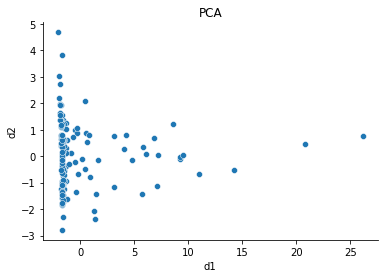

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pi = make_pipeline(StandardScaler(),PCA(n_components=2)) #Esa funcion con make_pipeline
Xp = pd.DataFrame(pi.fit_transform(X),columns=['d1','d2'])


sns.scatterplot(Xp["d1"], Xp["d2"]).set(title="PCA")
sns.despine()
plt.show()

In [34]:
pi.steps[-1][-1].explained_variance_ratio_.cumsum() #Varianza explicada

array([0.84685785, 0.92531331])

In [35]:
from sklearn.preprocessing import MinMaxScaler
sm = MinMaxScaler()
Xmm = pd.DataFrame(sm.fit_transform(X),columns=X.columns)
Xmm

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
0,1.000000,1.000000,0.406789,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.469072,1.000000,1.000000,1.000000,1.000000,0.990681,1.000000,0.829465,0.091187
1,0.352485,0.308724,1.000000,0.325020,0.316506,0.509393,0.293133,0.386394,0.323490,0.292296,0.354743,0.583674,0.261621,0.273229,0.359028,0.383133,0.469962,0.349225,0.315290,0.071765
2,0.122258,0.113908,0.155531,0.119861,0.120250,0.150086,0.111126,0.123109,0.121531,0.088450,0.123536,0.322905,0.076851,0.080548,0.083969,0.089081,0.080712,0.087593,0.082962,0.051649
3,0.267220,0.354615,0.132387,0.236610,0.244470,0.347004,0.258588,0.265381,0.268794,0.333525,0.264759,0.511014,0.287550,0.322277,0.291864,0.404915,0.507322,0.350661,0.408519,0.119555
4,0.441004,0.649299,0.160763,0.371743,0.495179,0.771949,0.371387,0.434498,0.446567,0.357999,0.444112,0.382280,0.368372,0.383223,0.408702,0.375593,0.574139,0.473578,0.390521,0.055111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.000095,0.000275,0.000268,0.000026,0.001134,0.000369,0.000038,0.000135,0.000061,0.001388,0.000064,0.904747,0.001402,0.001412,0.000241,0.000559,0.000166,0.000574,0.000309,0.549080
138,0.000551,0.000618,0.000637,0.000511,0.003403,0.001692,0.000307,0.000568,0.000536,0.001659,0.000527,0.488749,0.002102,0.001840,0.000999,0.001955,0.001831,0.002585,0.001560,0.240665
139,0.000234,0.000118,0.000369,0.000263,0.001134,0.000916,0.000072,0.000227,0.000240,0.000846,0.000229,0.700505,0.000467,0.000642,0.000444,0.001117,0.000416,0.000574,0.000411,0.252484
140,0.000302,0.000240,0.004427,0.000114,0.000567,0.001450,0.000040,0.000373,0.000242,0.000846,0.000299,0.566664,0.000234,0.000984,0.000315,0.000279,0.000250,0.000287,0.000583,0.232418


In [36]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=10, random_state=1000) #dim 2, perplexity vecinos que estimamos
Xtmm = tsne.fit_transform(Xmm)
Xtmm = pd.DataFrame(Xtmm, columns=['x', 'y'], index=df.index)
Xtmm

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



,x,y
0,-10.472069,37.852467
1,-4.425673,35.106701
2,0.171909,21.934669
3,-5.964004,31.765957
4,-8.206024,34.697903
...,...,...
137,-35.666019,-15.216235
138,7.825072,-1.182498
139,6.584645,-8.863168
140,6.979723,-5.314390


/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



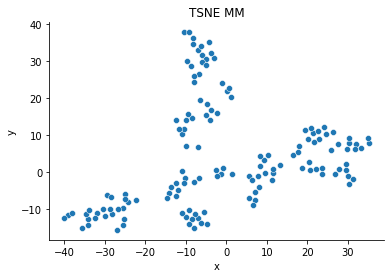

In [37]:
sns.scatterplot(Xtmm["x"], Xtmm["y"]).set(title="TSNE MM")
sns.despine()
plt.show()

In [38]:
ss = StandardScaler(with_std=False)
Xss = pd.DataFrame(ss.fit_transform(X),columns=X.columns)
Xss

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
0,775621.422535,190564.549296,10610.774648,574446.098592,1623.077465,145618.528169,656415.633803,357001.943662,418619.478873,27105.112676,748516.309859,0.358402,4014.894366,21657.514085,51043.133803,3341.788732,11112.035211,3241.253521,45136.014085,-0.029072
1,244011.422535,49648.549296,28296.774648,166066.098592,418.077465,68496.528169,167596.633803,124794.943662,119216.478873,6198.112676,237813.309859,1.569623,853.894366,4676.514085,16410.133803,1132.788732,4854.035211,975.253521,15139.014085,-0.031574
2,54995.422535,9935.549296,3119.774648,41940.098592,72.077465,12014.528169,41733.633803,25159.943662,29835.478873,176.112676,54819.309859,-1.186420,62.894366,174.514085,1548.133803,79.788732,176.035211,64.253521,1585.014085,-0.034165
3,174009.422535,59003.549296,2429.774648,112576.098592,291.077465,42969.528169,143707.633803,78999.943662,95009.478873,7416.112676,166593.309859,0.801684,964.894366,5822.514085,12781.133803,1210.788732,5303.035211,980.253521,20578.014085,-0.025417
4,316685.422535,119074.549296,3275.774648,194335.098592,733.077465,109769.528169,221711.633803,142998.943662,173686.478873,8139.112676,308546.309859,-0.558886,1310.894366,7246.514085,19094.133803,1105.788732,6106.035211,1408.253521,19528.014085,-0.033719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,-45300.577465,-13228.450704,-1509.225352,-30562.901408,-137.922535,-11520.471831,-35087.366197,-21377.056338,-23923.521127,-2395.887324,-42904.690141,4.963021,-260.105634,-1674.485915,-2975.866197,-237.211268,-791.964789,-238.746479,-3236.985915,0.029916
138,-44926.577465,-13158.450704,-1498.225352,-30269.901408,-133.922535,-11312.471831,-34901.366197,-21213.056338,-23713.521127,-2387.887324,-42538.690141,0.566370,-257.105634,-1664.485915,-2934.866197,-232.211268,-771.964789,-231.746479,-3163.985915,-0.009816
139,-45186.577465,-13260.450704,-1506.225352,-30419.901408,-137.922535,-11434.471831,-35063.366197,-21342.056338,-23844.521127,-2411.887324,-42774.690141,2.804404,-264.105634,-1692.485915,-2964.866197,-235.211268,-788.964789,-238.746479,-3230.985915,-0.008293
140,-45130.577465,-13235.450704,-1385.225352,-30509.901408,-138.922535,-11350.471831,-35085.366197,-21287.056338,-23843.521127,-2411.887324,-42718.690141,1.389846,-265.105634,-1684.485915,-2971.866197,-238.211268,-790.964789,-239.746479,-3220.985915,-0.010878


In [39]:
Xtss = tsne.fit_transform(Xss)
Xtss = pd.DataFrame(Xtss, columns=['x', 'y'], index=df.index)

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



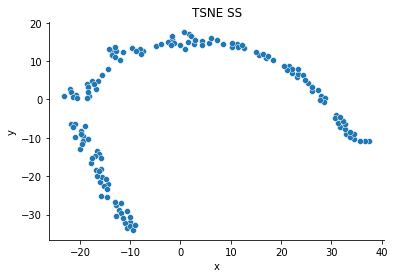

In [40]:
sns.scatterplot(Xtss["x"], Xtss["y"]).set(title="TSNE SS")
sns.despine()
plt.show()

In [41]:
from sklearn.manifold import MDS
mds = MDS(n_components=2,n_jobs=-1)
Xmmm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])
Xmmm

,d1,d2
0,-3.826750,0.420856
1,-1.420529,-0.640977
2,-0.231326,-0.278605
3,-1.111938,-0.041171
4,-1.709842,-0.063204
...,...,...
137,0.341991,0.492495
138,0.297561,-0.055683
139,0.443474,0.089082
140,0.355384,-0.016859


/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



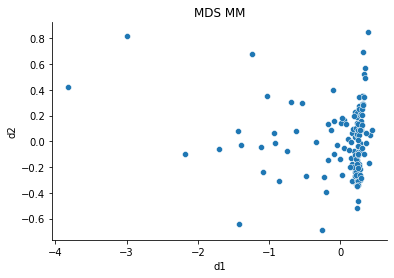

In [42]:
sns.scatterplot(Xmmm["d1"], Xmmm["d2"]).set(title="MDS MM")
sns.despine()
plt.show()

In [43]:
Xmss = pd.DataFrame(mds.fit_transform(Xss),columns=['d1','d2'])
Xmss

,d1,d2
0,-962417.763794,-1.166602e+06
1,-246817.090402,-3.863482e+05
2,-40056.201120,-9.900720e+04
3,-167896.738980,-2.907303e+05
4,-248736.862919,-5.465931e+05
...,...,...
137,42127.829233,7.506591e+04
138,41922.476175,7.438793e+04
139,42071.741113,7.484870e+04
140,42209.736795,7.472768e+04


/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



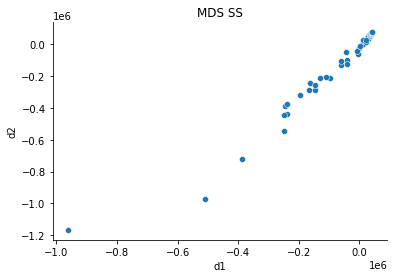

In [44]:
sns.scatterplot(Xmss["d1"], Xmss["d2"]).set(title="MDS SS")
sns.despine()
plt.show()

In [45]:
Xmm.to_csv("Data_escala.csv",index=False,encoding="utf-8")
Xp.to_csv("pca_covid.csv",index=False,encoding="utf-8")
Xtmm.to_csv("tsne_covid.csv",index=False,encoding="utf-8")
Xmmm.to_csv("mds_covid.csv",index=False,encoding="utf-8")

# Selección del modelo

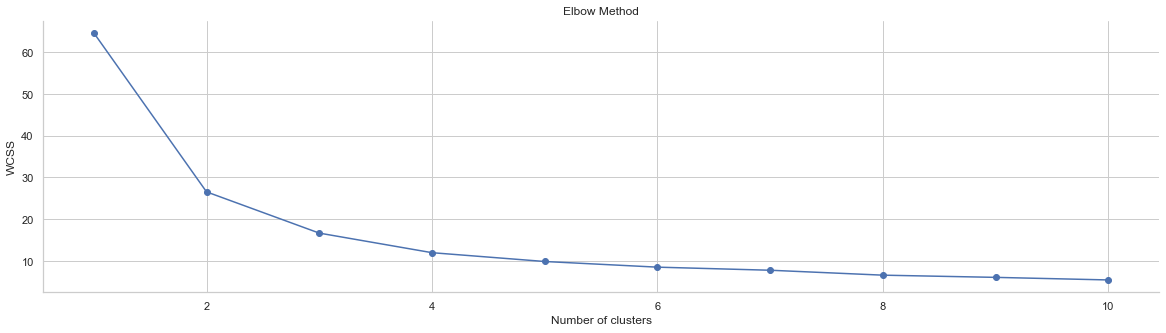

In [46]:
from sklearn.cluster import KMeans
#Calculamos el wcss o la inercia
wcss = []
for i in range(1, 11): #Rango de numero de clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    """Intanciamos el init es k-means++ para que no afecte tanto el cambio
    de centroides, en max iter es el numero de veces"""
    kmeans.fit(Xmm)
    wcss.append(kmeans.inertia_) #Guardamos la inercia
sns.set_theme(style="whitegrid")
plt.subplots(figsize=(20,5))
plt.plot(range(1, 11), wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
sns.despine()
plt.show()

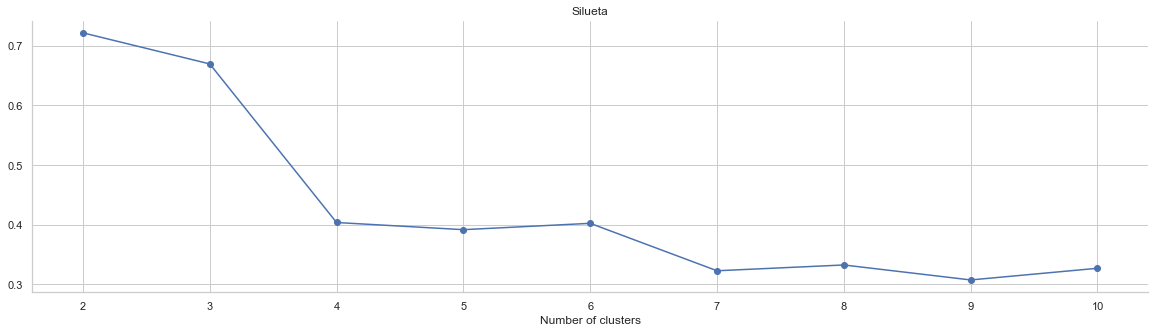

In [47]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples #Metricas
lst_silhouette = []
for k in range(2,11):
    cl_sil = KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init=10, random_state=0)
    cl_sil.fit(Xmm)
    lst_silhouette.append(silhouette_score(Xmm,cl_sil.predict(Xmm)))
    #compara maxima cohension y separacion
plt.subplots(figsize=(20,5))
plt.plot(range(2, 11), lst_silhouette,marker='o')
plt.title('Silueta')
plt.xlabel('Number of clusters')
sns.despine()
plt.show()

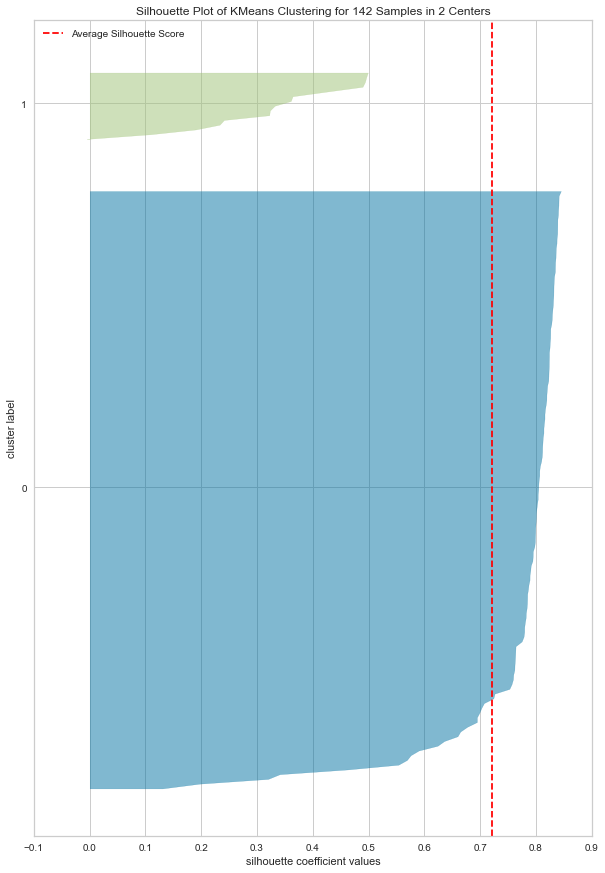

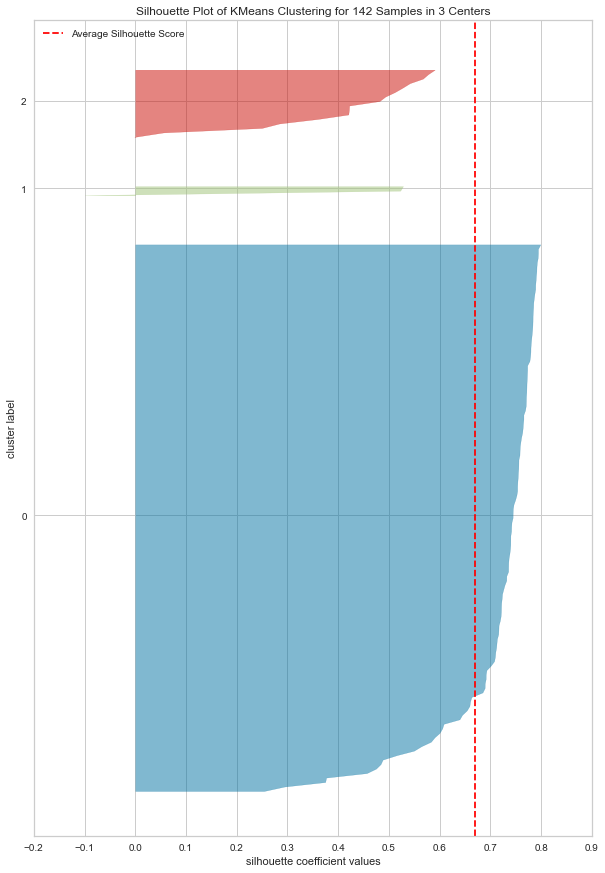

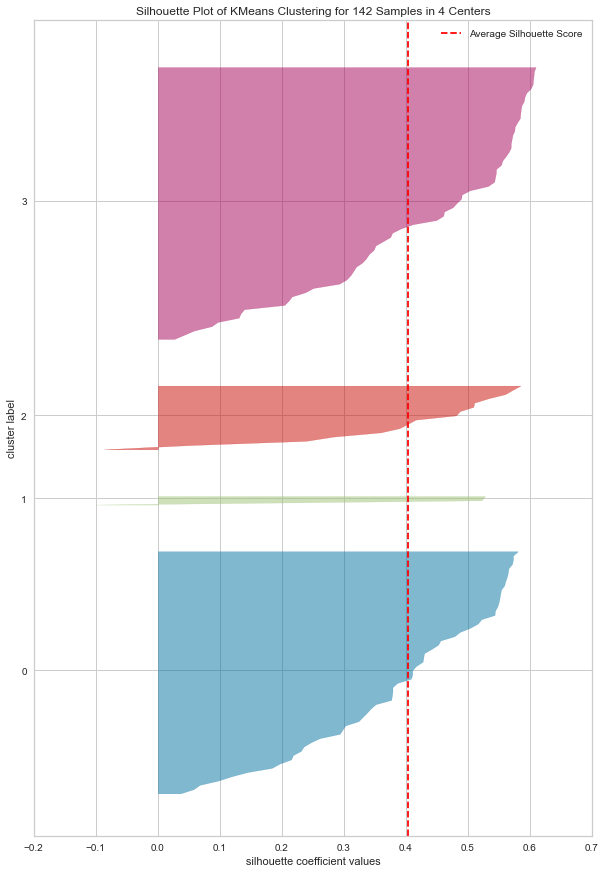

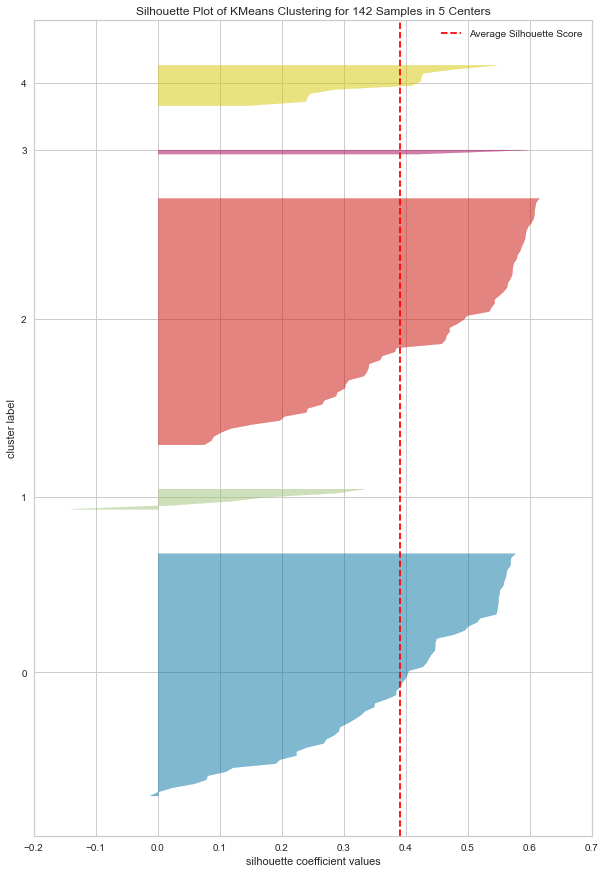

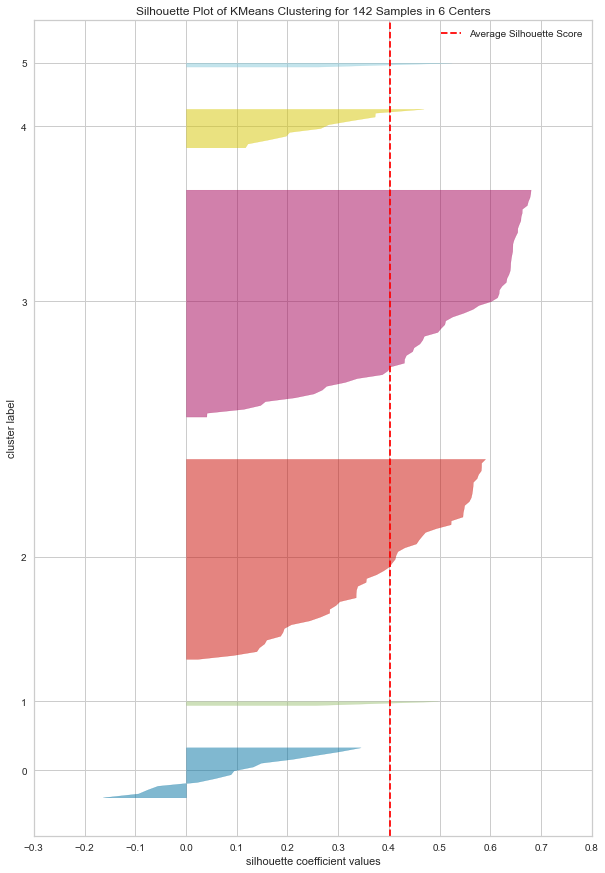

In [48]:
"""Visualizacion de la silueta,
epramos que todos los grupos tenga la misma
silueta y el ancho del grupo.
Cercano a uno y noa tan grande"""
from yellowbrick.cluster import SilhouetteVisualizer #Visualizacion

for j,i in enumerate([2, 3, 4, 5, 6]):
    fig, ax = plt.subplots(figsize=(10,15))
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)


    visualizer = SilhouetteVisualizer(km,ax=ax, colors='yellowbrick',)
    
    visualizer.fit(Xmm)
    visualizer.show()

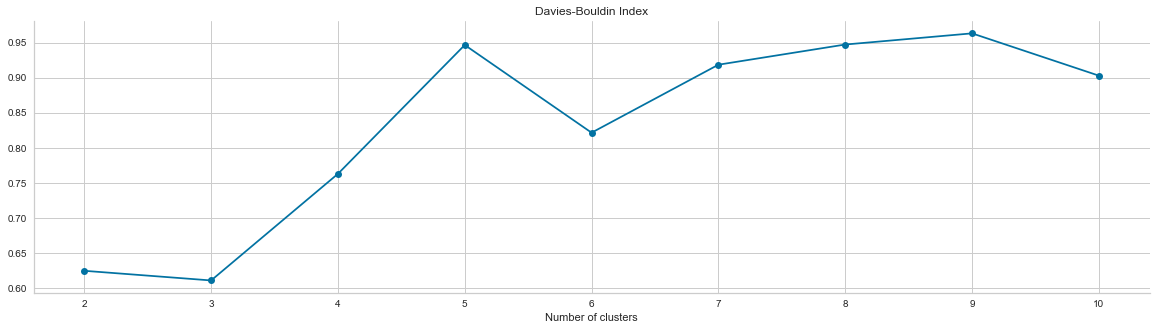

In [49]:
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k,init='k-means++', max_iter=300, n_init=10, random_state=0)
    cl_db.fit(Xmm)
    lst_dbscore.append(davies_bouldin_score(Xmm,cl_db.predict(Xmm)))
    #Mas pequeño mejor
plt.subplots(figsize=(20,5))
plt.plot(range(2, 11), lst_dbscore,marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
sns.despine()
plt.show()

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



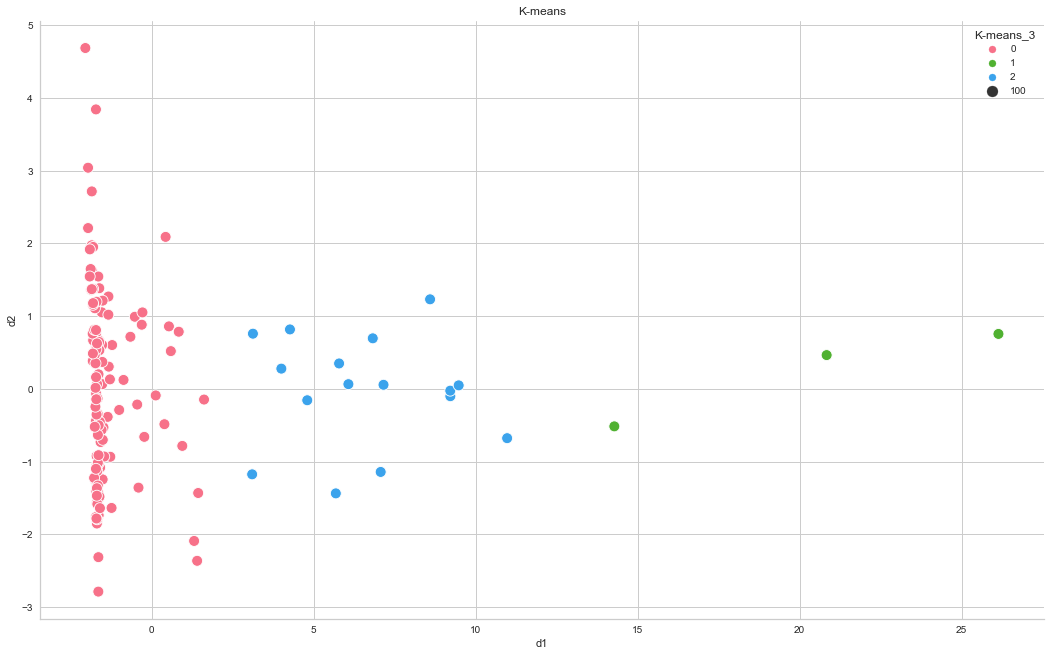

In [50]:
current_palette = sns.color_palette()
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
Xp["K-means_3"] = kmeans.fit_predict(Xmm) #Asigna datos al grupo que le corresponda
plt.subplots(figsize=(18,11))
sns.scatterplot(Xp["d1"], Xp["d2"],hue=Xp["K-means_3"],palette=sns.color_palette("husl", 3),size=100,sizes=(120, 120)).set(title="K-means")
sns.despine()
plt.show()

In [51]:
Xmmm["K-means_3"]=Xtmm["K-means_3"]=Xp["K-means_3"]

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



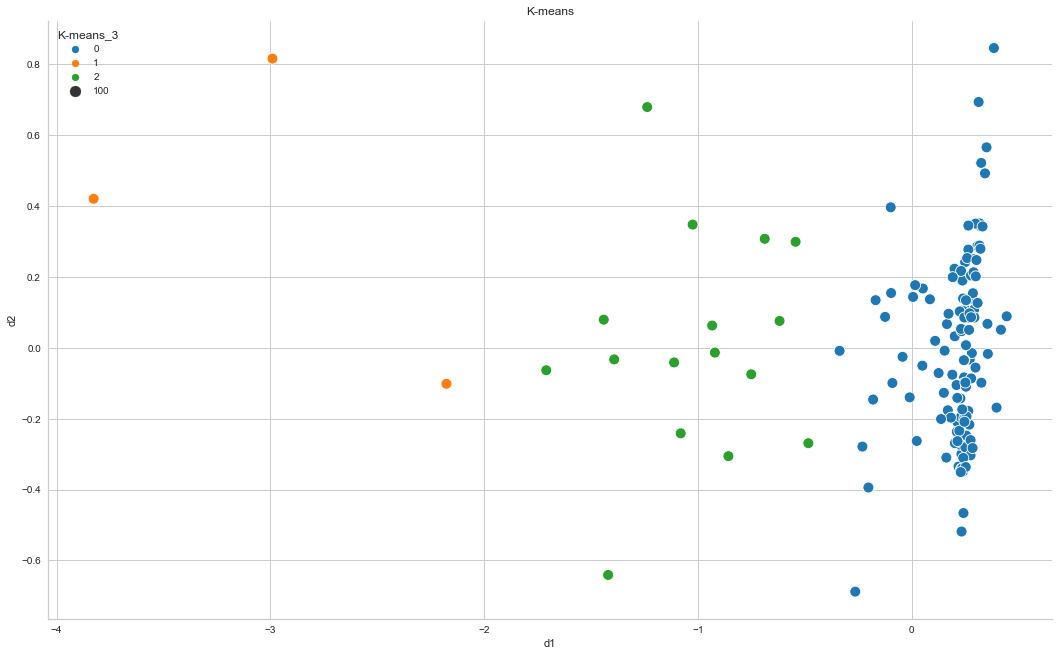

In [52]:
plt.subplots(figsize=(18,11))
sns.scatterplot(Xmmm["d1"], Xmmm["d2"],hue=Xmmm["K-means_3"],palette=sns.color_palette("tab10",3),size=100,sizes=(120, 120)).set(title="K-means")
sns.despine()
plt.show()

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



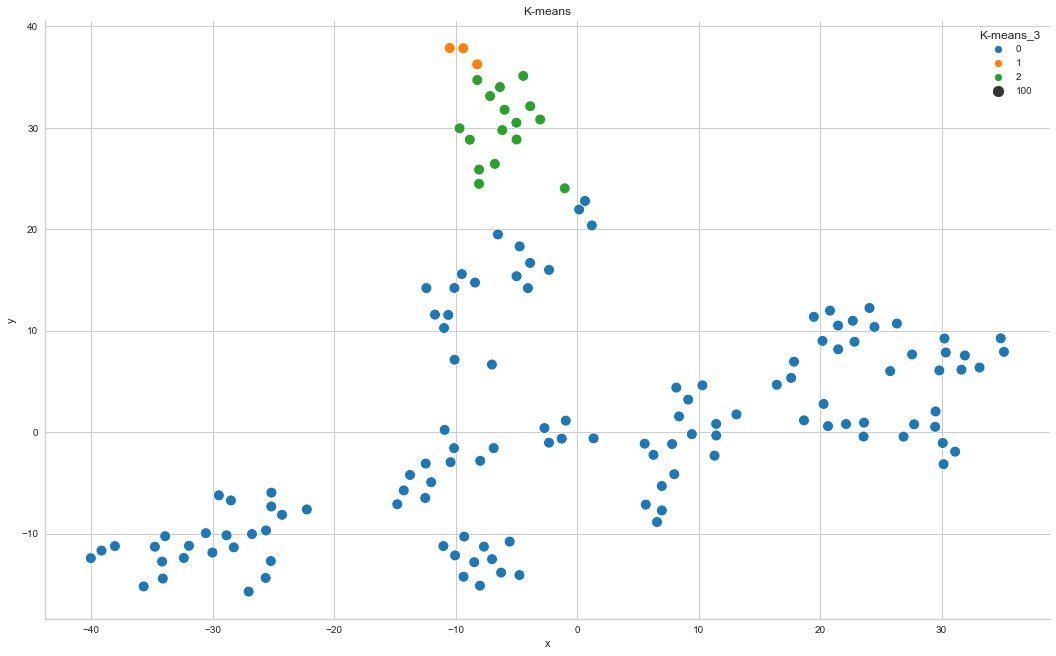

In [53]:
plt.subplots(figsize=(18,11))
sns.scatterplot(Xtmm["x"], Xtmm["y"],hue=Xtmm["K-means_3"],palette=sns.color_palette("tab10",3),size=100,sizes=(120, 120)).set(title="K-means")
sns.despine()
plt.show()

# K medioides

In [54]:
#k-medioides
from sklearn_extra.cluster import KMedoids #Instalar scikit-learn-extra
medoids=KMedoids(n_clusters=3, metric='euclidean',method='pam')

In [55]:
Xmmm["K-Medioides_3"]=Xtmm["K-Medioides_3"]=Xp["K-Medioides_3"]=medoids.fit_predict(Xmm)

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



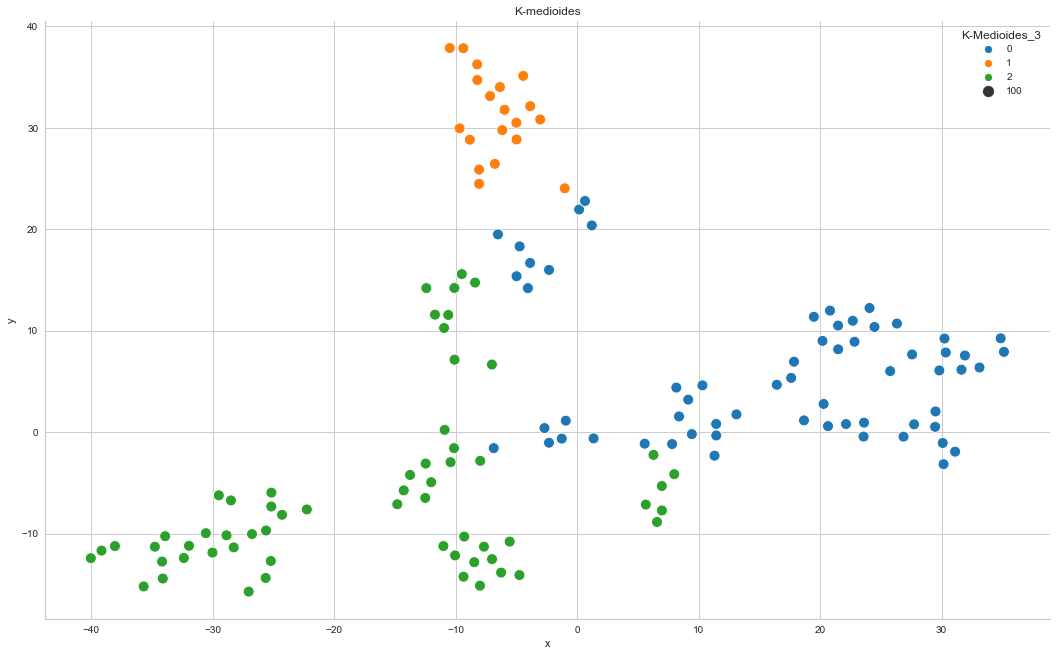

In [56]:
plt.subplots(figsize=(18,11))
sns.scatterplot(Xtmm["x"], Xtmm["y"],hue=Xtmm["K-Medioides_3"],palette=sns.color_palette("tab10",3),size=100,sizes=(120, 120)).set(title="K-medioides")
sns.despine()
plt.show()

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



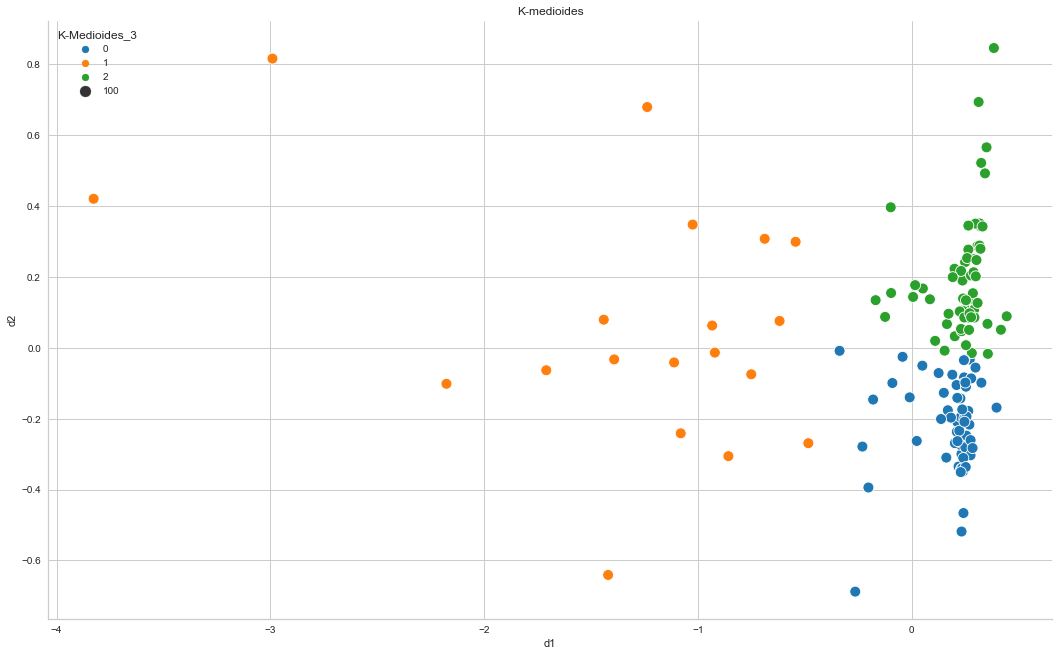

In [57]:
plt.subplots(figsize=(18,11))
sns.scatterplot(Xmmm["d1"], Xmmm["d2"],hue=Xmmm["K-Medioides_3"],palette=sns.color_palette("tab10",3),size=100,sizes=(120, 120)).set(title="K-medioides")
sns.despine()
plt.show()

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



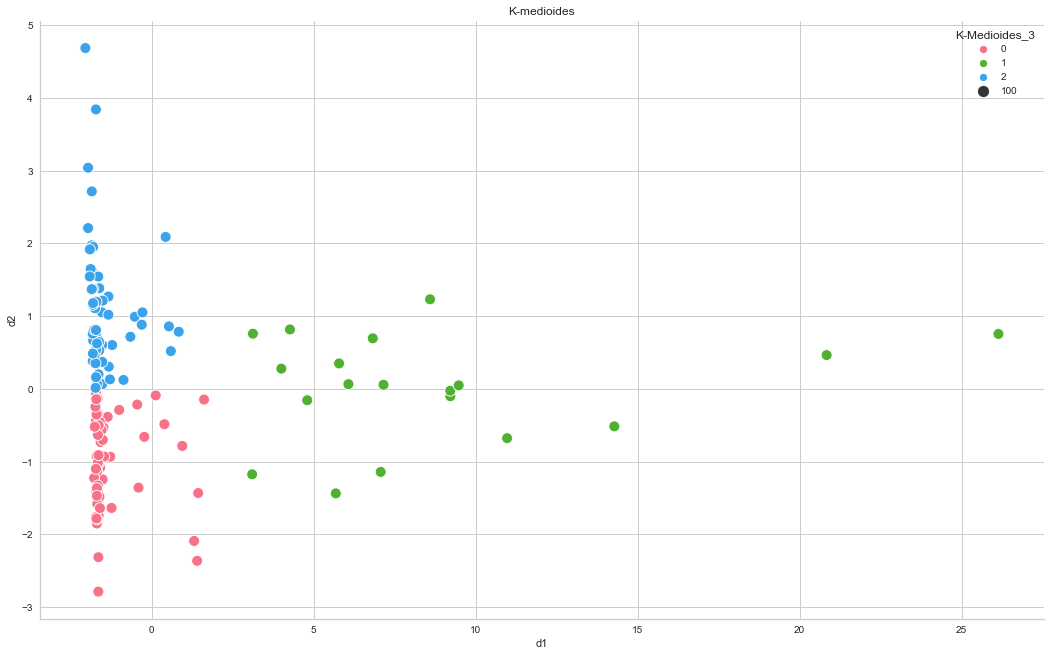

In [58]:
plt.subplots(figsize=(18,11))
sns.scatterplot(Xp["d1"], Xp["d2"],hue=Xp["K-Medioides_3"],palette=sns.color_palette("husl", 3),size=100,sizes=(120, 120)).set(title="K-medioides")
sns.despine()
plt.show()

In [59]:
df["K-means_3"]=Xp["K-means_3"]
df["K-Medioides_3"]=Xp["K-Medioides_3"]

In [60]:
df["K-means_3"].value_counts(1,dropna=False)

0    0.866197
2    0.112676
1    0.021127
Name: K-means_3, dtype: float64

In [61]:
df["K-Medioides_3"].value_counts(1,dropna=False)

0    0.436620
2    0.429577
1    0.133803
Name: K-Medioides_3, dtype: float64

In [62]:
#Guardamos la base
df.to_csv("TAD_clustering.csv",index=False,encoding="utf-8")

In [63]:
df.loc[df["K-Medioides_3"]==0]

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,K-means_3,K-Medioides_3
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0,46643.0,53833.0,2619.0,97857.0,37.189448,330.0,1886.0,4543.0,319.0,970.0,305.0,4843.0,0.008141,0,0
15,MILPA ALTA,CIUDAD DE MÉXICO,109384.0,29860.0,1222.0,78302.0,120.0,18741.0,92623.0,49520.0,59864.0,1987.0,107397.0,35.745292,279.0,1823.0,6842.0,275.0,1026.0,267.0,4672.0,0.006052,0,0
16,NO ESPECIFICADO,CIUDAD DE MÉXICO,79997.0,10720.0,19003.0,50274.0,297.0,9151.0,59047.0,32079.0,47918.0,2414.0,77583.0,35.699801,139.0,5.0,4032.0,441.0,566.0,305.0,2433.0,0.001488,0,0
18,NICOLÁS ROMERO,MÉXICO,36303.0,12357.0,1735.0,22211.0,165.0,10408.0,26781.0,18048.0,18255.0,4911.0,31392.0,38.272319,393.0,2667.0,2864.0,292.0,586.0,247.0,3069.0,0.037242,0,0
24,ACULCO,MÉXICO,1633.0,427.0,40.0,1166.0,11.0,358.0,1297.0,829.0,804.0,203.0,1430.0,35.624617,25.0,133.0,104.0,19.0,9.0,17.0,98.0,0.040416,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,ISIDRO FABELA,MÉXICO,786.0,181.0,89.0,516.0,1.0,194.0,561.0,399.0,387.0,48.0,738.0,35.954198,6.0,32.0,41.0,4.0,6.0,4.0,62.0,0.016539,0,0
132,TEPETLIXPA,MÉXICO,1090.0,315.0,28.0,747.0,11.0,284.0,830.0,634.0,456.0,91.0,999.0,36.621101,8.0,98.0,56.0,5.0,6.0,1.0,53.0,0.032110,0,0
133,ZUMPAHUACÁN,MÉXICO,1373.0,159.0,65.0,1149.0,5.0,224.0,1155.0,483.0,890.0,171.0,1202.0,35.188638,5.0,100.0,145.0,21.0,8.0,8.0,44.0,0.028405,0,0
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0,6.0,301.0,276.0,270.0,284.0,55.0,499.0,38.942238,10.0,47.0,60.0,7.0,22.0,9.0,94.0,0.032491,0,0


In [64]:
arquetipos=df[list(X.columns)+["K-Medioides_3"]].groupby(by="K-Medioides_3").mean()
arquetipos.style.background_gradient(cmap='Blues',axis=0)

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad
K-Medioides_3,,,,,,,,,,,,,,,,,,,,
0,11760.225806,3225.645161,673.354839,7861.225806,53.387097,2872.112903,8885.387097,5698.983871,6061.241935,886.467742,10873.758065,36.887397,78.919355,570.241935,669.451613,57.419355,117.709677,59.290323,684.870968,0.028032
1,281060.210526,81429.105263,7775.263158,191855.842105,719.105263,69504.631579,221025.736842,131684.157895,149376.052632,12023.789474,269036.421053,38.861418,1434.578947,8769.578947,18417.842105,1420.000000,5258.789474,1380.473684,20270.368421,0.018280
2,6376.459016,2350.278689,430.360656,3595.819672,47.475410,2466.459016,4013.163934,3200.950820,3175.508197,1040.606557,5335.852459,39.737504,94.737705,673.016393,554.524590,56.196721,90.622951,70.180328,574.344262,0.064298


/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Entidad', ylabel='count'>

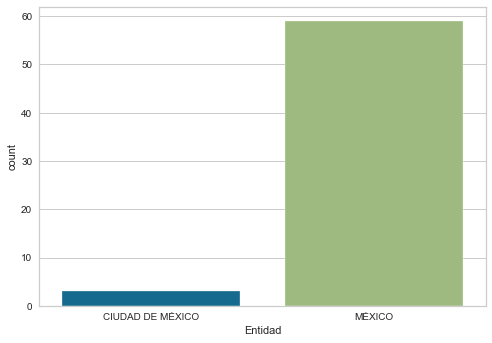

In [65]:
sns.countplot(df.loc[df["K-Medioides_3"]==0,"Entidad"])

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Entidad', ylabel='count'>

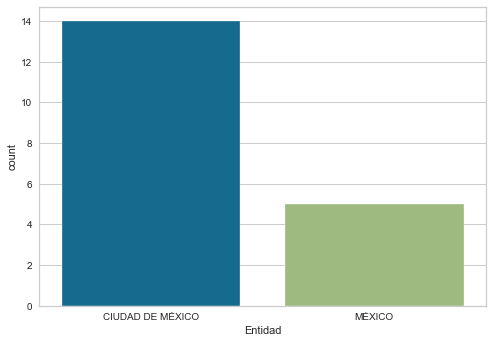

In [66]:
sns.countplot(df.loc[df["K-Medioides_3"]==1,"Entidad"])

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Entidad', ylabel='count'>

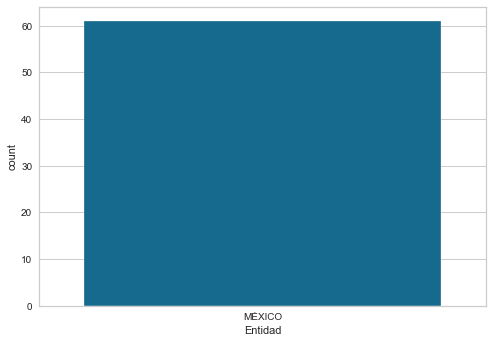

In [67]:
sns.countplot(df.loc[df["K-Medioides_3"]==2,"Entidad"])

In [68]:
df.loc[df["K-Medioides_3"]==2].sort_values(by="Tasa de mortalidad",ascending=False)

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,K-means_3,K-Medioides_3
68,TLATLAYA,MÉXICO,353.0,134.0,16.0,203.0,7.0,203.0,191.0,182.0,171.0,111.0,242.0,44.345609,7.0,90.0,48.0,9.0,5.0,5.0,30.0,0.130312,0,2
39,ATIZAPÁN,MÉXICO,3718.0,1581.0,161.0,1976.0,23.0,1750.0,2262.0,1862.0,1856.0,1242.0,2476.0,43.183701,112.0,534.0,457.0,54.0,58.0,49.0,377.0,0.114847,0,2
66,HUEYPOXTLA,MÉXICO,977.0,386.0,105.0,486.0,15.0,592.0,343.0,502.0,475.0,265.0,712.0,39.355169,32.0,165.0,118.0,9.0,7.0,40.0,87.0,0.113613,0,2
106,LUVIANOS,MÉXICO,461.0,217.0,14.0,230.0,16.0,380.0,149.0,217.0,244.0,131.0,330.0,41.739696,17.0,107.0,51.0,14.0,12.0,8.0,56.0,0.108460,0,2
86,APAXCO,MÉXICO,1464.0,533.0,63.0,868.0,18.0,378.0,1076.0,786.0,678.0,273.0,1191.0,38.723361,20.0,136.0,150.0,20.0,20.0,54.0,169.0,0.091530,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,SAN MARTÍN DE LAS PIRÁMIDES,MÉXICO,1418.0,505.0,94.0,819.0,9.0,651.0,719.0,764.0,654.0,139.0,1279.0,39.029619,23.0,98.0,117.0,18.0,22.0,21.0,143.0,0.038787,0,2
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0,2.0,179.0,114.0,141.0,153.0,31.0,263.0,41.180272,3.0,19.0,30.0,4.0,5.0,2.0,27.0,0.034014,0,2
62,SAN SIMÓN DE GUERRERO,MÉXICO,211.0,82.0,2.0,127.0,0.0,108.0,115.0,113.0,98.0,29.0,182.0,40.715640,2.0,21.0,23.0,5.0,4.0,0.0,16.0,0.033175,0,2
60,ACOLMAN,MÉXICO,8166.0,2437.0,478.0,5251.0,41.0,3704.0,4469.0,4118.0,4048.0,802.0,7364.0,39.544575,94.0,567.0,624.0,75.0,121.0,97.0,883.0,0.032084,0,2


In [69]:
df.loc[df["K-Medioides_3"]==0].sort_values(by="Tasa de mortalidad",ascending=False)

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,K-means_3,K-Medioides_3
123,JIQUIPILCO,MÉXICO,1508.0,427.0,70.0,1011.0,21.0,737.0,787.0,782.0,726.0,292.0,1216.0,37.221485,43.0,225.0,97.0,15.0,9.0,16.0,89.0,0.054377,0,0
99,SAN FELIPE DEL PROGRESO,MÉXICO,3222.0,971.0,172.0,2079.0,30.0,1454.0,1776.0,1796.0,1426.0,547.0,2675.0,35.929547,43.0,388.0,196.0,37.0,25.0,33.0,158.0,0.048727,0,0
78,TEJUPILCO,MÉXICO,3788.0,1916.0,78.0,1794.0,55.0,2569.0,1744.0,1812.0,1976.0,476.0,3312.0,37.043031,59.0,396.0,280.0,52.0,85.0,35.0,325.0,0.044615,0,0
69,ALMOLOYA DEL RÍO,MÉXICO,1228.0,284.0,237.0,707.0,12.0,532.0,668.0,598.0,630.0,123.0,1105.0,37.442182,22.0,104.0,92.0,20.0,18.0,12.0,64.0,0.043974,0,0
115,OTUMBA,MÉXICO,1755.0,601.0,153.0,1001.0,21.0,869.0,815.0,886.0,869.0,225.0,1530.0,38.190313,43.0,152.0,151.0,11.0,20.0,40.0,209.0,0.043875,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,JUCHITEPEC,MÉXICO,2248.0,688.0,51.0,1509.0,8.0,338.0,1914.0,1142.0,1106.0,127.0,2121.0,33.776690,9.0,84.0,81.0,4.0,19.0,9.0,49.0,0.012456,0,0
114,ZACAZONAPAN,MÉXICO,170.0,31.0,7.0,132.0,0.0,87.0,83.0,90.0,80.0,13.0,157.0,39.111765,1.0,8.0,6.0,1.0,5.0,0.0,8.0,0.011765,0,0
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0,46643.0,53833.0,2619.0,97857.0,37.189448,330.0,1886.0,4543.0,319.0,970.0,305.0,4843.0,0.008141,0,0
15,MILPA ALTA,CIUDAD DE MÉXICO,109384.0,29860.0,1222.0,78302.0,120.0,18741.0,92623.0,49520.0,59864.0,1987.0,107397.0,35.745292,279.0,1823.0,6842.0,275.0,1026.0,267.0,4672.0,0.006052,0,0


In [70]:
df.loc[df["K-Medioides_3"]==1].sort_values(by="Tasa de mortalidad",ascending=False)

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,K-means_3,K-Medioides_3
17,TOLUCA,MÉXICO,80148.0,30326.0,2866.0,46956.0,667.0,35479.0,47326.0,38220.0,41928.0,12221.0,67927.0,38.684371,985.0,10114.0,6102.0,694.0,1035.0,692.0,6220.0,0.046763,2,1
20,ECATEPEC DE MORELOS,MÉXICO,204319.0,67040.0,6826.0,130453.0,1057.0,57398.0,153937.0,103433.0,100886.0,21160.0,183159.0,39.206804,2152.0,14514.0,16413.0,1426.0,3006.0,1535.0,21438.0,0.040554,2,1
22,NAUCALPAN DE JUÁREZ,MÉXICO,112931.0,41390.0,6064.0,65477.0,725.0,34655.0,80632.0,55400.0,57531.0,15042.0,97889.0,39.336444,1199.0,8394.0,8107.0,968.0,1599.0,714.0,7990.0,0.038333,2,1
21,TLALNEPANTLA DE BAZ,MÉXICO,122714.0,41109.0,8415.0,73190.0,428.0,31394.0,92346.0,58215.0,64499.0,10747.0,111967.0,38.942354,1060.0,5283.0,9181.0,915.0,2062.0,834.0,11301.0,0.032107,2,1
26,NEZAHUALCÓYOTL,MÉXICO,179134.0,57231.0,8407.0,113496.0,927.0,51962.0,131148.0,87167.0,91967.0,14005.0,165129.0,39.236119,1960.0,10363.0,13363.0,1072.0,2779.0,1064.0,16075.0,0.031301,2,1
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0,431.0,54583.0,178885.0,100483.0,119007.0,9859.0,209631.0,39.177553,1232.0,7534.0,15776.0,1450.0,6097.0,1221.0,23836.0,0.016889,2,1
10,IZTACALCO,CIUDAD DE MÉXICO,210222.0,56401.0,3241.0,150580.0,473.0,44942.0,175290.0,96393.0,113829.0,9338.0,200884.0,39.408796,1036.0,7012.0,14361.0,1120.0,4341.0,1016.0,16650.0,0.016150,2,1
5,GUSTAVO A. MADERO,CIUDAD DE MÉXICO,611406.0,167475.0,14947.0,428984.0,1208.0,136382.0,502579.0,287783.0,323623.0,23122.0,588284.0,38.902687,2712.0,16285.0,41489.0,3413.0,12018.0,3210.0,58343.0,0.014066,1,1
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0,1763.0,157232.0,691593.0,378485.0,442617.0,29548.0,791554.0,38.734271,4282.0,23369.0,54038.0,3581.0,11906.0,3482.0,48394.0,0.013235,1,1
14,MIGUEL HIDALGO,CIUDAD DE MÉXICO,167490.0,46320.0,5299.0,115871.0,518.0,40582.0,132975.0,78725.0,88765.0,6463.0,161027.0,39.439089,791.0,4440.0,11158.0,941.0,4477.0,824.0,13901.0,0.012425,2,1


In [71]:
(df.loc[df["K-Medioides_3"]==0].sort_values(by="Tasa de mortalidad",ascending=False))[["Municipio","Entidad","Tasa de mortalidad"]]

,Municipio,Entidad,Tasa de mortalidad
123,JIQUIPILCO,MÉXICO,0.054377
99,SAN FELIPE DEL PROGRESO,MÉXICO,0.048727
78,TEJUPILCO,MÉXICO,0.044615
69,ALMOLOYA DEL RÍO,MÉXICO,0.043974
115,OTUMBA,MÉXICO,0.043875
...,...,...,...
85,JUCHITEPEC,MÉXICO,0.012456
114,ZACAZONAPAN,MÉXICO,0.011765
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,0.008141
15,MILPA ALTA,CIUDAD DE MÉXICO,0.006052


In [72]:
(df.loc[df["K-Medioides_3"]==1].sort_values(by="Tasa de mortalidad",ascending=False))[["Municipio","Entidad","Tasa de mortalidad"]]

,Municipio,Entidad,Tasa de mortalidad
17,TOLUCA,MÉXICO,0.046763
20,ECATEPEC DE MORELOS,MÉXICO,0.040554
22,NAUCALPAN DE JUÁREZ,MÉXICO,0.038333
21,TLALNEPANTLA DE BAZ,MÉXICO,0.032107
26,NEZAHUALCÓYOTL,MÉXICO,0.031301
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,0.016889
10,IZTACALCO,CIUDAD DE MÉXICO,0.016150
5,GUSTAVO A. MADERO,CIUDAD DE MÉXICO,0.014066
0,IZTAPALAPA,CIUDAD DE MÉXICO,0.013235
14,MIGUEL HIDALGO,CIUDAD DE MÉXICO,0.012425


In [73]:
(df.loc[df["K-Medioides_3"]==2].sort_values(by="Tasa de mortalidad",ascending=False))[["Municipio","Entidad","Tasa de mortalidad"]]

,Municipio,Entidad,Tasa de mortalidad
68,TLATLAYA,MÉXICO,0.130312
39,ATIZAPÁN,MÉXICO,0.114847
66,HUEYPOXTLA,MÉXICO,0.113613
106,LUVIANOS,MÉXICO,0.108460
86,APAXCO,MÉXICO,0.091530
...,...,...,...
65,SAN MARTÍN DE LAS PIRÁMIDES,MÉXICO,0.038787
139,ZACUALPAN,MÉXICO,0.034014
62,SAN SIMÓN DE GUERRERO,MÉXICO,0.033175
60,ACOLMAN,MÉXICO,0.032084


* 1-> Municipios más poblados
* 0-> Periferia municipios más poblados, cercanos a la cdmx y los municipios mas grandes de EDOMEX
* 2-> Municipios más pequeños con menos centros de salud

[Text(0.5, 1.0, 'PCA')]

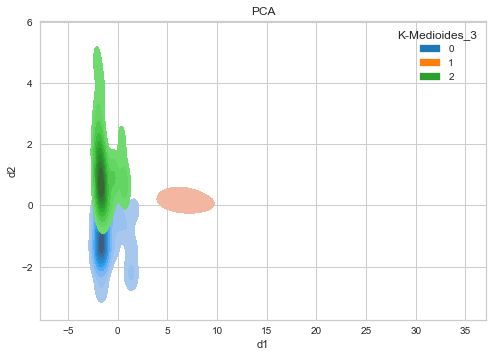

In [74]:
sns.kdeplot(data=Xp,x="d1",y="d2",fill=True,hue='K-Medioides_3',palette=sns.color_palette("tab10",3)).set(title="PCA")

[Text(0.5, 1.0, 'MDS')]

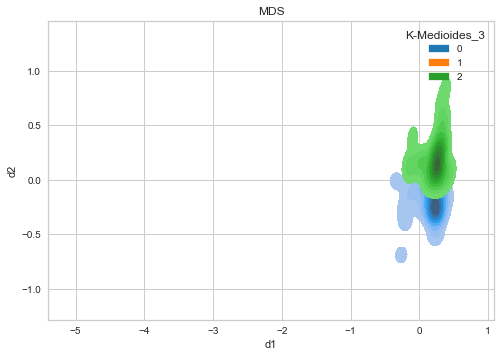

In [75]:
sns.kdeplot(data=Xmmm,x="d1",y="d2",fill=True,hue='K-Medioides_3',palette=sns.color_palette("tab10",3)).set(title="MDS")

[Text(0.5, 1.0, 'TSNE')]

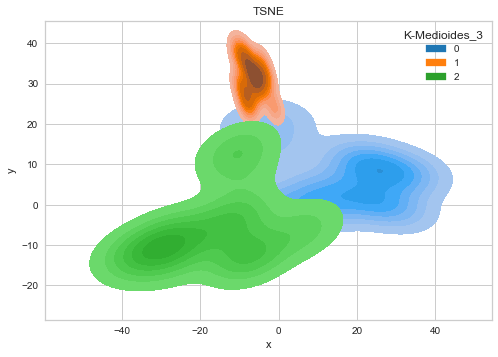

In [76]:
sns.kdeplot(data=Xtmm,x="x",y="y",fill=True,hue='K-Medioides_3',palette=sns.color_palette("tab10",3)).set(title="TSNE")

In [77]:
from sklearn.tree import DecisionTreeClassifier 
escalada= Xmm
tree = DecisionTreeClassifier()
tree.fit(escalada,df['K-Medioides_3'])
importances=tree.feature_importances_
feature_importance= sorted(zip(importances, list(escalada.columns)), reverse=True)
data_tree = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(data_tree['importance'])
feature= list(data_tree['feature'])

In [78]:
data_tree

,importance,feature
0,0.473471,Tasa de mortalidad
1,0.296001,Enfermedad Diabetes
2,0.187124,Edad Promedio
3,0.022777,Prueba Antigeno
4,0.020628,Prueba Lab
5,0.000000,UCI
6,0.000000,Total de Registros
7,0.000000,Sexo Mujer
8,0.000000,Sexo Hombre
9,0.000000,Pacientes Hospitalizado


In [79]:
data_tree.plot.bar(x='feature',y='importance')

In [80]:
from scipy.stats import kruskal
aux = df[['K-Medioides_3']+list(data_tree['feature'])].groupby(['K-Medioides_3']).mean()
ls_res = []
for feature in aux.columns:
    l = []
    for cl in df["K-Medioides_3"].unique():
        l.append(df.loc[df["K-Medioides_3"]==cl, feature].to_list())
    kr = kruskal(*l)
    ls_res.append((feature,kr.pvalue))

In [81]:
ls_res

[('Tasa de mortalidad', 1.9889006480621606e-21),
 ('Enfermedad Diabetes', 1.6752287587155503e-11),
 ('Edad Promedio', 1.701187507308438e-19),
 ('Prueba Antigeno', 1.4143850647110087e-11),
 ('Prueba Lab', 2.0100758776921783e-11),
 ('UCI', 2.3441865620753344e-11),
 ('Total de Registros', 1.896111674187452e-11),
 ('Sexo Mujer', 2.0550884346759948e-11),
 ('Sexo Hombre', 1.8598513303908862e-11),
 ('Pacientes Hospitalizado', 4.504181297189676e-11),
 ('Pacientes Ambulatorio', 1.5420319095041692e-11),
 ('Intubados', 9.723353527276778e-12),
 ('Enfermedad Obesidad', 2.1855223389595397e-11),
 ('Enfermedad Neumonia', 1.8719170110985395e-11),
 ('Enfermedad Inmusupr', 1.9782706871685886e-11),
 ('Enfermedad Epoc', 2.181579648890234e-11),
 ('Enfermedad Asma', 2.1519362287893838e-11),
 ('Casos Sospechosos', 5.5491875028565956e-11),
 ('Casos Positivos', 2.219524190204531e-11),
 ('Casos Negativos', 1.4631006371074714e-11)]

In [82]:
data_kruskal=pd.DataFrame(ls_res,columns=['Feature','p_value']).round(3)
data_kruskal

,Feature,p_value
0,Tasa de mortalidad,0.0
1,Enfermedad Diabetes,0.0
2,Edad Promedio,0.0
3,Prueba Antigeno,0.0
4,Prueba Lab,0.0
5,UCI,0.0
6,Total de Registros,0.0
7,Sexo Mujer,0.0
8,Sexo Hombre,0.0
9,Pacientes Hospitalizado,0.0


In [83]:
from statsmodels.stats.multicomp import MultiComparison
variables_cambio=data_kruskal[data_kruskal['p_value']<.05]['Feature'].to_list()
for v in variables_cambio:
    print(v)
    mc = MultiComparison(df[v],df['K-Medioides_3'])
    display(mc.tukeyhsd().summary())
    print('\n')

Tasa de mortalidad


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.0098,0.0435,-0.0193,-0.0002,True
0,2,0.0363,-0.0,0.0297,0.0428,True
1,2,0.046,-0.0,0.0365,0.0556,True




Enfermedad Diabetes


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,17748.3905,-0.0,15006.5746,20490.2064,True
0,2,-114.927,0.9886,-2000.5732,1770.7192,False
1,2,-17863.3175,-0.0,-20610.4,-15116.235,True




Edad Promedio


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1.974,0.0,1.2111,2.7369,True
0,2,2.8501,-0.0,2.3254,3.3748,True
1,2,0.8761,0.0203,0.1117,1.6404,True




Prueba Antigeno


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,212140.3497,-0.0,176414.7187,247865.9808,True
0,2,-4872.2232,0.8856,-29442.0354,19697.5891,False
1,2,-217012.5729,-0.0,-252806.8272,-181218.3186,True




Prueba Lab


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,66632.5187,-0.0,58151.1207,75113.9167,True
0,2,-405.6539,0.9851,-6238.6189,5427.3111,False
1,2,-67038.1726,-0.0,-75535.862,-58540.4831,True




UCI


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,665.7182,-0.0,573.4015,758.0348,True
0,2,-5.9117,0.9735,-69.4012,57.5778,False
1,2,-671.6299,-0.0,-764.1238,-579.1359,True




Total de Registros


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,269299.9847,-0.0,227070.5955,311529.374,True
0,2,-5383.7668,0.8992,-34426.4495,23658.9159,False
1,2,-274683.7515,-0.0,-316994.2568,-232373.2462,True




Sexo Mujer


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,143314.8107,-0.0,120515.7124,166113.9089,True
0,2,-2885.7337,0.9006,-18565.5005,12794.0331,False
1,2,-146200.5444,-0.0,-169043.4362,-123357.6527,True




Sexo Hombre


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,125985.174,-0.0,106503.8122,145466.5358,True
0,2,-2498.0331,0.8981,-15896.0721,10900.006,False
1,2,-128483.2071,-0.0,-148001.9895,-108964.4247,True




Pacientes Hospitalizado


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,11137.3217,-0.0,9348.0627,12926.5808,True
0,2,154.1388,0.9526,-1076.3995,1384.6771,False
1,2,-10983.1829,-0.0,-12775.8788,-9190.487,True




Pacientes Ambulatorio


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,258162.663,-0.0,217073.9031,299251.4229,True
0,2,-5537.9056,0.8881,-33796.1361,22720.3249,False
1,2,-263700.5686,-0.0,-304868.2536,-222532.8836,True




Intubados


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1355.6596,-0.0,1143.2533,1568.0659,True
0,2,15.8184,0.9644,-130.2612,161.8979,False
1,2,-1339.8412,-0.0,-1552.6555,-1127.027,True




Enfermedad Obesidad


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,19585.4975,-0.0,16558.4879,22612.507,True
0,2,-110.5267,0.9913,-2192.311,1971.2576,False
1,2,-19696.0242,-0.0,-22728.8482,-16663.2002,True




Enfermedad Neumonia


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,8199.337,-0.0,6952.3327,9446.3413,True
0,2,102.7745,0.9566,-754.8356,960.3846,False
1,2,-8096.5626,-0.0,-9345.9622,-6847.1629,True




Enfermedad Inmusupr


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1321.1834,-0.0,1131.1442,1511.2226,True
0,2,10.89,0.9788,-119.8068,141.5869,False
1,2,-1310.2934,-0.0,-1500.6976,-1119.8891,True




Enfermedad Epoc


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1362.5806,-0.0,1166.609,1558.5523,True
0,2,-1.2226,0.9997,-135.9995,133.5542,False
1,2,-1363.8033,-0.0,-1560.1514,-1167.4552,True




Enfermedad Asma


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,5141.0798,-0.0,4419.2695,5862.8901,True
0,2,-27.0867,0.9908,-523.5019,469.3284,False
1,2,-5168.1665,-0.0,-5891.3633,-4444.9697,True




Casos Sospechosos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,7101.9083,-0.0,5347.014,8856.8026,True
0,2,-242.9942,0.8823,-1449.8986,963.9103,False
1,2,-7344.9025,-0.0,-9103.1677,-5586.6373,True




Casos Positivos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,78203.4601,-0.0,66284.7556,90122.1646,True
0,2,-875.3665,0.9653,-9072.2918,7321.5589,False
1,2,-79078.8266,-0.0,-91020.425,-67137.2281,True




Casos Negativos


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,183994.6163,-0.0,153469.7041,214519.5285,True
0,2,-4265.4061,0.8802,-25258.4954,16727.6831,False
1,2,-188260.0224,-0.0,-218843.5682,-157676.4767,True


Se separan en tasa de mortalidad y Edad promedio

In [84]:
lista_enfermedad = [c for c in df.columns if "Enfermedad" in c]

In [85]:
aux=df[lista_enfermedad+["K-Medioides_3"]].groupby(by="K-Medioides_3").mean()
import plotly.graph_objects as go
fig = go.Figure()
#radar
for i,row in aux.iterrows():
    fig.add_trace(go.Scatterpolar(r=row.values,
                                  theta=lista_enfermedad[:-1],
                                  fill='toself',
                                  name=f'cluster {i}'))
fig.show()

* Grupo 1 con mas enfermedades
* Grupo 0 con mas diabetes
* Grupo 2 con mas neumonia y tasa de mortalidad

In [86]:
arquetipos.reset_index().to_csv("Arquetipos_Kmedioides.csv",index=False,encoding="utf-8")

In [87]:
aux

,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad
K-Medioides_3,,,,,,
0,570.241935,669.451613,57.419355,117.709677,59.290323,684.870968
1,8769.578947,18417.842105,1420.000000,5258.789474,1380.473684,20270.368421
2,673.016393,554.524590,56.196721,90.622951,70.180328,574.344262


In [88]:
separacion=df[["Edad Promedio","Tasa de mortalidad","K-Medioides_3"]].groupby(by="K-Medioides_3").mean().reset_index()

<AxesSubplot:xlabel='K-Medioides_3', ylabel='Edad Promedio'>

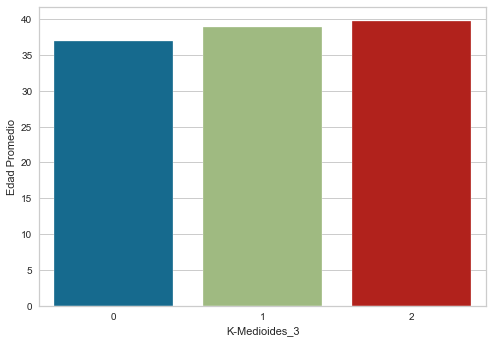

In [89]:
sns.barplot(x="K-Medioides_3", y="Edad Promedio", data=separacion)

<AxesSubplot:xlabel='K-Medioides_3', ylabel='Tasa de mortalidad'>

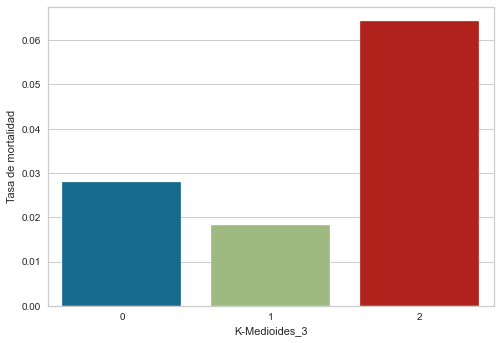

In [90]:
sns.barplot(x="K-Medioides_3", y="Tasa de mortalidad", data=separacion)

In [91]:
pd.to_pickle(medoids,"K-Medioides_3_Covid.pkl")

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='K-Medioides_3', ylabel='count'>

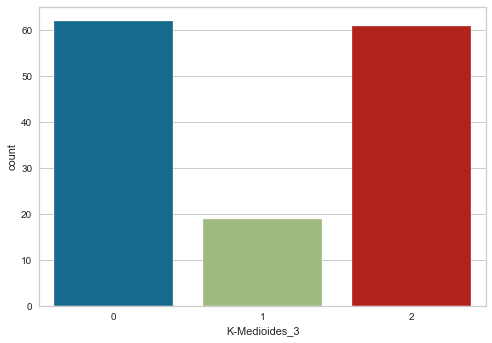

In [92]:
df=pd.read_csv("TAD_clustering.csv",encoding="utf-8")
sns.countplot(df["K-Medioides_3"])

In [93]:
df["K-Medioides_3"].value_counts(1)

0    0.436620
2    0.429577
1    0.133803
Name: K-Medioides_3, dtype: float64

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='K-means_3', ylabel='count'>

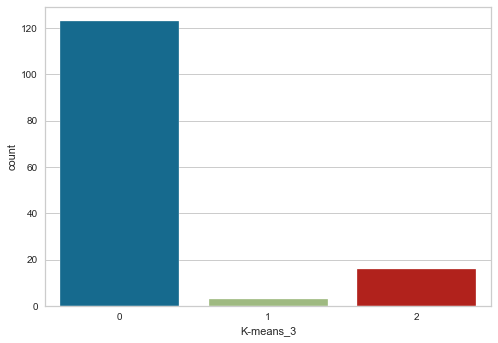

In [94]:
sns.countplot(df["K-means_3"])

In [95]:
arquetipos=pd.read_csv("Arquetipos_Kmedioides.csv",encoding="utf-8")
arquetipos.set_index("K-Medioides_3",inplace=True)

In [96]:
arquetipos[arquetipos.columns[:6]].style.background_gradient(cmap='Blues',axis=0)

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab
K-Medioides_3,,,,,,
0,11760.225806,3225.645161,673.354839,7861.225806,53.387097,2872.112903
1,281060.210526,81429.105263,7775.263158,191855.842105,719.105263,69504.631579
2,6376.459016,2350.278689,430.360656,3595.819672,47.475410,2466.459016


In [97]:
arquetipos[arquetipos.columns[6:10]].style.background_gradient(cmap='Blues',axis=0)

,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado
K-Medioides_3,,,,
0,8885.387097,5698.983871,6061.241935,886.467742
1,221025.736842,131684.157895,149376.052632,12023.789474
2,4013.163934,3200.950820,3175.508197,1040.606557


In [98]:
arquetipos[list(arquetipos.columns[10:16])+["Tasa de mortalidad"]].style.background_gradient(cmap='Blues',axis=0)

,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Tasa de mortalidad
K-Medioides_3,,,,,,,
0,10873.758065,36.887397,78.919355,570.241935,669.451613,57.419355,0.028032
1,269036.421053,38.861418,1434.578947,8769.578947,18417.842105,1420.000000,0.018280
2,5335.852459,39.737504,94.737705,673.016393,554.524590,56.196721,0.064298


In [99]:
arquetipos[arquetipos.columns[16:-1]].style.background_gradient(cmap='Blues',axis=0)

,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad
K-Medioides_3,,,
0,117.709677,59.290323,684.870968
1,5258.789474,1380.473684,20270.368421
2,90.622951,70.180328,574.344262


# Extra Anglomerativo

In [100]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering #Clauster anglomerativo

from scipy.spatial.distance import pdist

from scipy.cluster.hierarchy import linkage, dendrogram

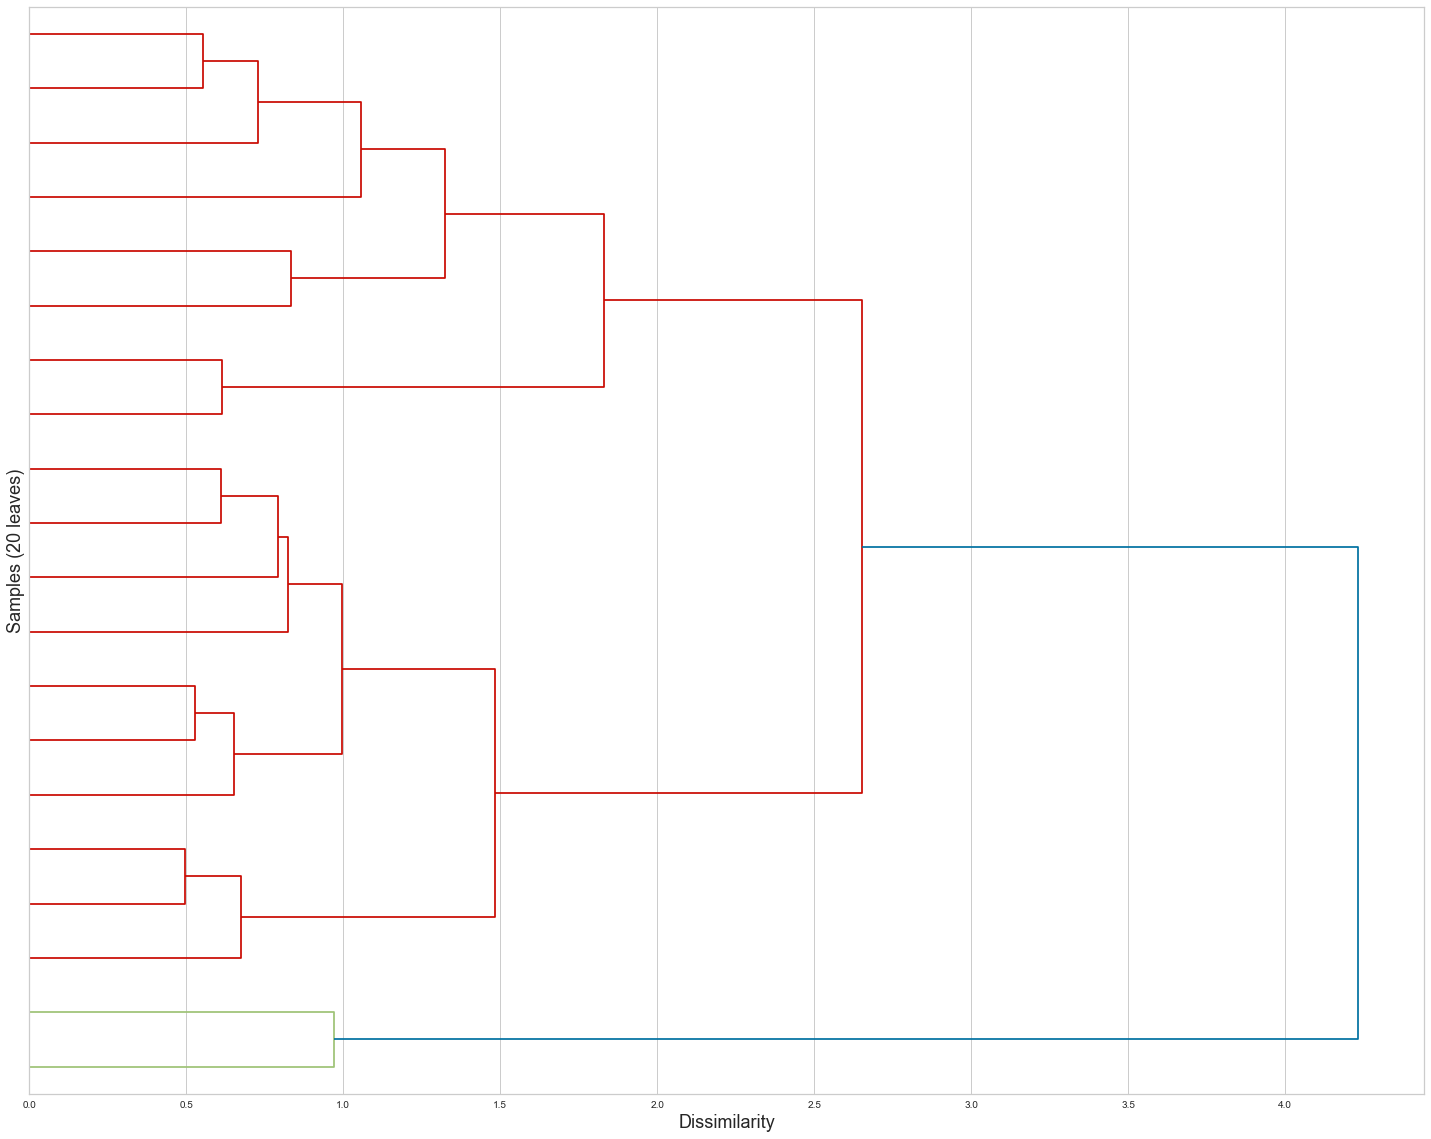

In [101]:
"""Completo"""
dm = pdist(Xmm, metric='euclidean')
Z = linkage(dm, method='complete') #Metodo completo

fig, ax = plt.subplots(figsize=(25, 20))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=20, no_labels=True, ax=ax)



ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (20 leaves)', fontsize=18)

plt.show()

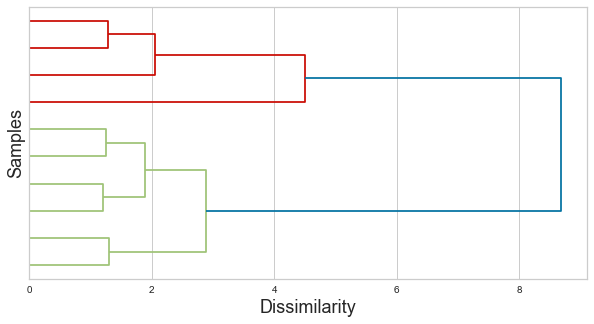

In [102]:
"""ward"""
dm = pdist(Xmm, metric='euclidean') #Forzosamente por ser ward
Z = linkage(dm, method='ward')

fig, ax = plt.subplots(figsize=(10, 5))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=10, no_labels=True, ax=ax)

#ultimas 10 hijas

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

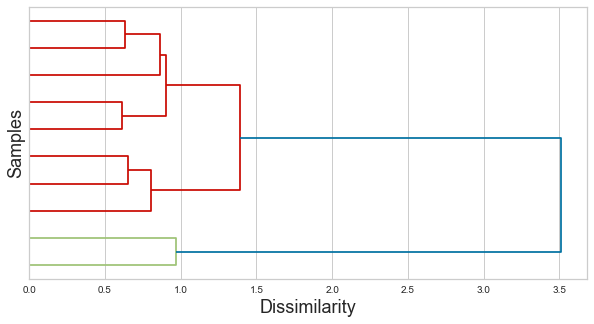

In [103]:
"""centroid"""
dm = pdist(Xmm, metric='euclidean') #Forzosamente por ser ward
Z = linkage(dm, method='centroid')

fig, ax = plt.subplots(figsize=(10, 5))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=10, no_labels=True, ax=ax)

#ultimas 10 hijas

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

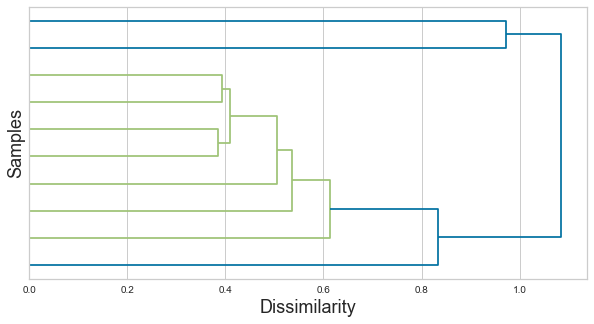

In [104]:
"""Single"""
dm = pdist(Xmm, metric='euclidean') #Forzosamente por ser ward
Z = linkage(dm, method='single')

fig, ax = plt.subplots(figsize=(10, 5))

d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=10, no_labels=True, ax=ax)

#ultimas 10 hijas

ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples', fontsize=18)

plt.show()

In [105]:
dff = pd.concat([Xmm, Xtmm], axis=1)
dff

,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,x,y,K-means_3,K-Medioides_3
0,1.000000,1.000000,0.406789,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.469072,1.000000,1.000000,1.000000,1.000000,0.990681,1.000000,0.829465,0.091187,-10.472069,37.852467,1,1
1,0.352485,0.308724,1.000000,0.325020,0.316506,0.509393,0.293133,0.386394,0.323490,0.292296,0.354743,0.583674,0.261621,0.273229,0.359028,0.383133,0.469962,0.349225,0.315290,0.071765,-4.425673,35.106701,2,1
2,0.122258,0.113908,0.155531,0.119861,0.120250,0.150086,0.111126,0.123109,0.121531,0.088450,0.123536,0.322905,0.076851,0.080548,0.083969,0.089081,0.080712,0.087593,0.082962,0.051649,0.171909,21.934669,0,0
3,0.267220,0.354615,0.132387,0.236610,0.244470,0.347004,0.258588,0.265381,0.268794,0.333525,0.264759,0.511014,0.287550,0.322277,0.291864,0.404915,0.507322,0.350661,0.408519,0.119555,-5.964004,31.765957,2,1
4,0.441004,0.649299,0.160763,0.371743,0.495179,0.771949,0.371387,0.434498,0.446567,0.357999,0.444112,0.382280,0.368372,0.383223,0.408702,0.375593,0.574139,0.473578,0.390521,0.055111,-8.206024,34.697903,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.000095,0.000275,0.000268,0.000026,0.001134,0.000369,0.000038,0.000135,0.000061,0.001388,0.000064,0.904747,0.001402,0.001412,0.000241,0.000559,0.000166,0.000574,0.000309,0.549080,-35.666019,-15.216235,0,2
138,0.000551,0.000618,0.000637,0.000511,0.003403,0.001692,0.000307,0.000568,0.000536,0.001659,0.000527,0.488749,0.002102,0.001840,0.000999,0.001955,0.001831,0.002585,0.001560,0.240665,7.825072,-1.182498,0,0
139,0.000234,0.000118,0.000369,0.000263,0.001134,0.000916,0.000072,0.000227,0.000240,0.000846,0.000229,0.700505,0.000467,0.000642,0.000444,0.001117,0.000416,0.000574,0.000411,0.252484,6.584645,-8.863168,0,2
140,0.000302,0.000240,0.004427,0.000114,0.000567,0.001450,0.000040,0.000373,0.000242,0.000846,0.000299,0.566664,0.000234,0.000984,0.000315,0.000279,0.000250,0.000287,0.000583,0.232418,6.979723,-5.314390,0,2


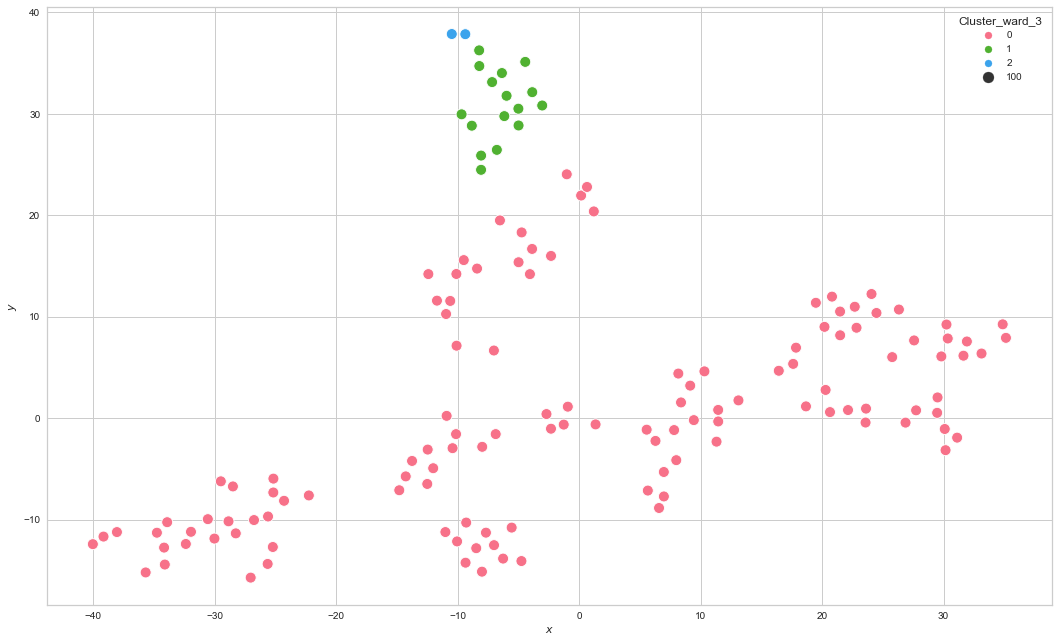

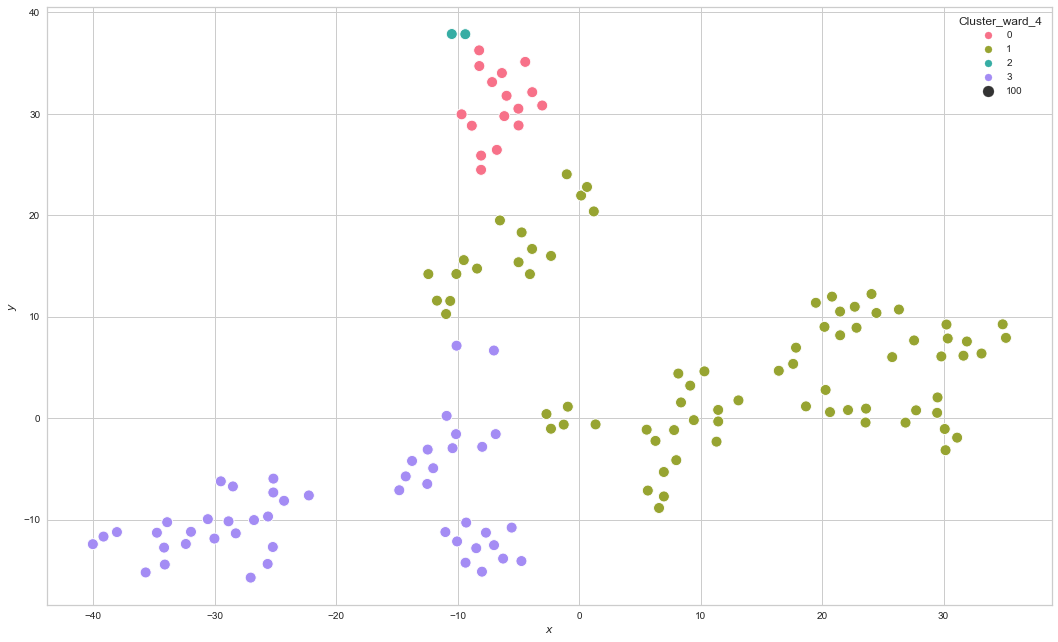

In [106]:
for n in (3,4):
  #Probamos con 4 y 6 grupos
    ag = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward') #Llamamos al clauster anglomerativo
    #affinity mediciones de las metricas, ward es forzoso euclideana
    Y_pred = ag.fit_predict(Xmm) #Pasamos nuestro conjunto de datos estandarizado

    df_pred = pd.Series(Y_pred, name='Cluster_ward_'+str(n), index=df.index)
    dff = pd.concat([dff, df_pred], axis=1)

    fig, ax = plt.subplots(figsize=(18, 11))
    sns.scatterplot(x='x',
                    y='y',
                    hue='Cluster_ward_'+str(n),
                    size=100,
                    
                    sizes=(120, 120),
                    palette=sns.color_palette("husl", n),
                    data=dff,
                    ax=ax)

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    plt.show()

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Cluster_ward_4', ylabel='count'>

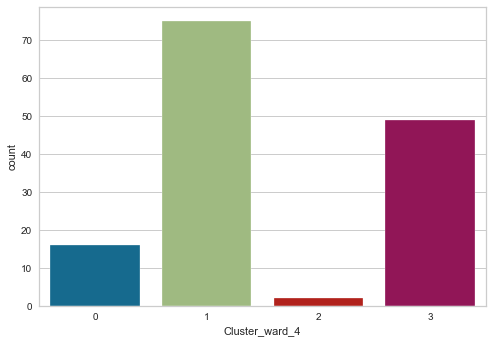

In [107]:
sns.countplot(dff["Cluster_ward_4"])

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Cluster_ward_3', ylabel='count'>

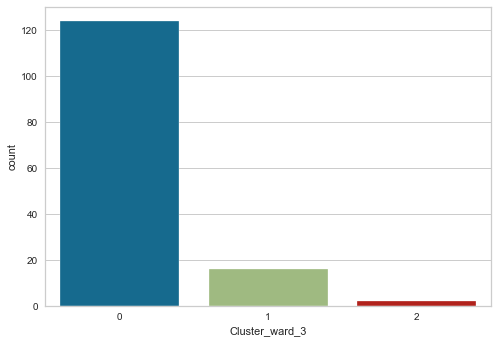

In [108]:
sns.countplot(dff["Cluster_ward_3"])

In [109]:
df

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,K-means_3,K-Medioides_3
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0,1763.0,157232.0,691593.0,378485.0,442617.0,29548.0,791554.0,38.734271,4282.0,23369.0,54038.0,3581.0,11906.0,3482.0,48394.0,0.013235,1,1
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0,62962.0,29816.0,196714.0,558.0,80110.0,202774.0,146278.0,143214.0,8641.0,280851.0,39.945491,1121.0,6388.0,19405.0,1372.0,5648.0,1216.0,18397.0,0.010733,2,1
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0,46643.0,53833.0,2619.0,97857.0,37.189448,330.0,1886.0,4543.0,319.0,970.0,305.0,4843.0,0.008141,0,0
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0,431.0,54583.0,178885.0,100483.0,119007.0,9859.0,209631.0,39.177553,1232.0,7534.0,15776.0,1450.0,6097.0,1221.0,23836.0,0.016889,2,1
4,TLALPAN,CIUDAD DE MÉXICO,362166.0,132388.0,4795.0,224983.0,873.0,121383.0,256889.0,164482.0,197684.0,10582.0,351584.0,37.816982,1578.0,8958.0,22089.0,1345.0,6900.0,1649.0,22786.0,0.008587,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0,85.0,10.0,85.0,2.0,93.0,90.0,106.0,74.0,47.0,133.0,43.338889,7.0,37.0,19.0,2.0,2.0,2.0,21.0,0.072222,0,2
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0,6.0,301.0,276.0,270.0,284.0,55.0,499.0,38.942238,10.0,47.0,60.0,7.0,22.0,9.0,94.0,0.032491,0,0
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0,2.0,179.0,114.0,141.0,153.0,31.0,263.0,41.180272,3.0,19.0,30.0,4.0,5.0,2.0,27.0,0.034014,0,2
140,TEXCALYACAC,MÉXICO,350.0,78.0,134.0,138.0,1.0,263.0,92.0,196.0,154.0,31.0,319.0,39.765714,2.0,27.0,23.0,1.0,3.0,1.0,37.0,0.031429,0,2


In [110]:
df["Cluster_ward_3"]=dff["Cluster_ward_3"]
df["Cluster_ward_4"]=dff["Cluster_ward_4"]
df

,Municipio,Entidad,Total de Registros,Casos Positivos,Casos Sospechosos,Casos Negativos,UCI,Prueba Lab,Prueba Antigeno,Sexo Hombre,Sexo Mujer,Pacientes Hospitalizado,Pacientes Ambulatorio,Edad Promedio,Intubados,Enfermedad Neumonia,Enfermedad Diabetes,Enfermedad Epoc,Enfermedad Asma,Enfermedad Inmusupr,Enfermedad Obesidad,Tasa de mortalidad,K-means_3,K-Medioides_3,Cluster_ward_3,Cluster_ward_4
0,IZTAPALAPA,CIUDAD DE MÉXICO,821102.0,203878.0,12130.0,605094.0,1763.0,157232.0,691593.0,378485.0,442617.0,29548.0,791554.0,38.734271,4282.0,23369.0,54038.0,3581.0,11906.0,3482.0,48394.0,0.013235,1,1,2,2
1,VENUSTIANO CARRANZA,CIUDAD DE MÉXICO,289492.0,62962.0,29816.0,196714.0,558.0,80110.0,202774.0,146278.0,143214.0,8641.0,280851.0,39.945491,1121.0,6388.0,19405.0,1372.0,5648.0,1216.0,18397.0,0.010733,2,1,1,0
2,CUAJIMALPA DE MORELOS,CIUDAD DE MÉXICO,100476.0,23249.0,4639.0,72588.0,212.0,23628.0,76911.0,46643.0,53833.0,2619.0,97857.0,37.189448,330.0,1886.0,4543.0,319.0,970.0,305.0,4843.0,0.008141,0,0,0,1
3,AZCAPOTZALCO,CIUDAD DE MÉXICO,219490.0,72317.0,3949.0,143224.0,431.0,54583.0,178885.0,100483.0,119007.0,9859.0,209631.0,39.177553,1232.0,7534.0,15776.0,1450.0,6097.0,1221.0,23836.0,0.016889,2,1,1,0
4,TLALPAN,CIUDAD DE MÉXICO,362166.0,132388.0,4795.0,224983.0,873.0,121383.0,256889.0,164482.0,197684.0,10582.0,351584.0,37.816982,1578.0,8958.0,22089.0,1345.0,6900.0,1649.0,22786.0,0.008587,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,POLOTITLÁN,MÉXICO,180.0,85.0,10.0,85.0,2.0,93.0,90.0,106.0,74.0,47.0,133.0,43.338889,7.0,37.0,19.0,2.0,2.0,2.0,21.0,0.072222,0,2,0,3
138,TONATICO,MÉXICO,554.0,155.0,21.0,378.0,6.0,301.0,276.0,270.0,284.0,55.0,499.0,38.942238,10.0,47.0,60.0,7.0,22.0,9.0,94.0,0.032491,0,0,0,1
139,ZACUALPAN,MÉXICO,294.0,53.0,13.0,228.0,2.0,179.0,114.0,141.0,153.0,31.0,263.0,41.180272,3.0,19.0,30.0,4.0,5.0,2.0,27.0,0.034014,0,2,0,1
140,TEXCALYACAC,MÉXICO,350.0,78.0,134.0,138.0,1.0,263.0,92.0,196.0,154.0,31.0,319.0,39.765714,2.0,27.0,23.0,1.0,3.0,1.0,37.0,0.031429,0,2,0,1


In [111]:
df.to_csv("TAD_clustering.csv",index=False,encoding="utf-8")

In [112]:
Xp["Cluster_ward_3"]=df["Cluster_ward_3"]

/Users/jesusarredondo/Documents/Diplomado/Proyecto/practicam1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



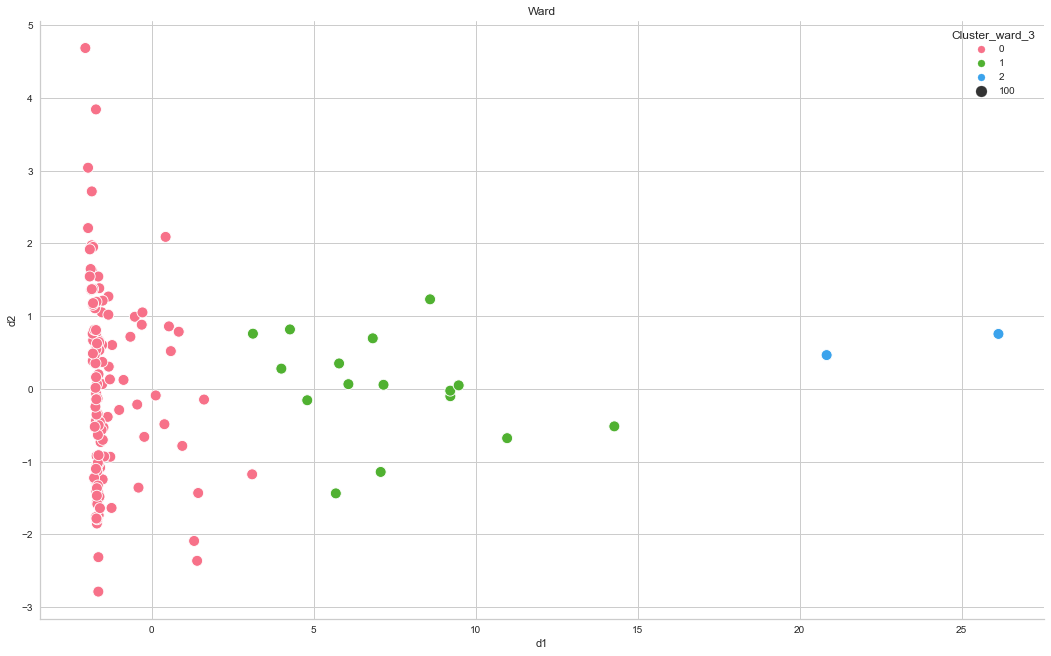

In [113]:
plt.subplots(figsize=(18,11))
sns.scatterplot(Xp["d1"], Xp["d2"],hue=Xp["Cluster_ward_3"],palette=sns.color_palette("husl", 3),size=100,sizes=(120, 120)).set(title="Ward")
sns.despine()
plt.show()